In [1]:
import sys
# sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
# sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob
import math

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Seaborn not found, so skipping imports of plotting in thicket.stats
To enable this plotting, install seaborn or thicket[plotting]


In [2]:
def exponential_representation(value):
    # Find the exponent (b) for base 2
    exponent = math.log2(value)  # Calculate the logarithm base 2
    base = 2  # Base is 2

    return f"{base}^{int(exponent)}"  # Return the formatted string

In [3]:
# For each of comp_large, comm, and main:
# Strong scaling plots for each input_size with lines for input_type (7 plots - 4 lines each)
# x axis = num_procs
# y axis = total_time
# 4 lines, one for each input type
# Strong scaling speedup plot for each input_type (4 plots)
# Weak scaling plots for each input_type (4 plots)
 
def strong_plot_total_time(time_col, size, df):
    plt.figure(figsize=(15, 8))
    local_df = df[df["name"].isin(["comm", "comp"])]
    print(type(local_df))
    df_sum = local_df.groupby(['num_procs', 'input_size', 'input_type'], as_index=False).agg({time_col: 'sum'})

    # Filter by input size (assuming 'size' is defined globally or passed as an argument)
    df_sum = df_sum[df_sum['input_size'] == size]

    # Sort the values for better plotting
    df_sum = df_sum.sort_values(by=['input_size', 'num_procs'])

    for input_type, group in df_sum.groupby('input_type'):
        plt.plot(group['num_procs'], group[time_col], marker='o', label=f'Input Type {input_type}')

    # Add labels and title
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel(time_col)
    plt.title(f'{time_col} vs Number of Processors, Grouped by Input Type(size={size}, Total Time)')


    # Add a legend
    plt.legend(title='Input Size')

    # Display the plot
    plt.grid(True)
    plt.show()   
    

In [4]:
def strong_plot(time_col, size, cali_region, df):
    plt.figure(figsize=(15, 8))
    local_df = df[df["name"] == cali_region]
    local_df = local_df[local_df["input_size"] == size]
    local_df = local_df.drop_duplicates(subset=['num_procs', 'input_size', 'input_type'])
    local_df = local_df.sort_values(by=['input_size', 'num_procs'])

    for input_size, group in local_df.groupby('input_type'):
        plt.plot(group['num_procs'], group[time_col], marker='o', label=f'{input_size}')

    # Add labels and title
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel(time_col)
    plt.title(f'{time_col} vs Number of Processors, Grouped by Input Type(size={size}, {cali_region})')

    # Add a legend
    plt.legend(title='Input Types')

    # Display the plot
    plt.grid(True)
    plt.show()

In [5]:
def weak_plot(time_col, input_type, cali_region, df):
    plt.figure(figsize=(15, 8))
    local_df = df[df["name"] == cali_region]
    local_df = local_df[~local_df["input_size"].isin([4,8, 256, 8192, 10000000])]
    local_df = local_df[local_df["input_type"] == input_type]
    local_df = local_df.drop_duplicates(subset=['num_procs', 'input_size'])
    local_df = local_df.sort_values(by=['input_size', 'num_procs'])

    for input_size, group in local_df.groupby('input_size'):
        plt.plot(group['num_procs'], group[time_col], marker='o', label=f'{exponential_representation(input_size)}')

    # Add labels and title
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel(time_col)
    plt.title(f'{time_col} vs Number of Processors, Grouped by Input Size({input_type}, {cali_region})')

    # Add a legend
    plt.legend(title='Input Size')

    # Display the plot
    plt.grid(True)
    plt.show()

In [6]:
all_tk = th.Thicket.from_caliperreader(glob("cali/**/*.cali", recursive=True))

(2/2) Creating Thicket: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:13<00:00, 16.17it/s]


<class 'pandas.core.frame.DataFrame'>


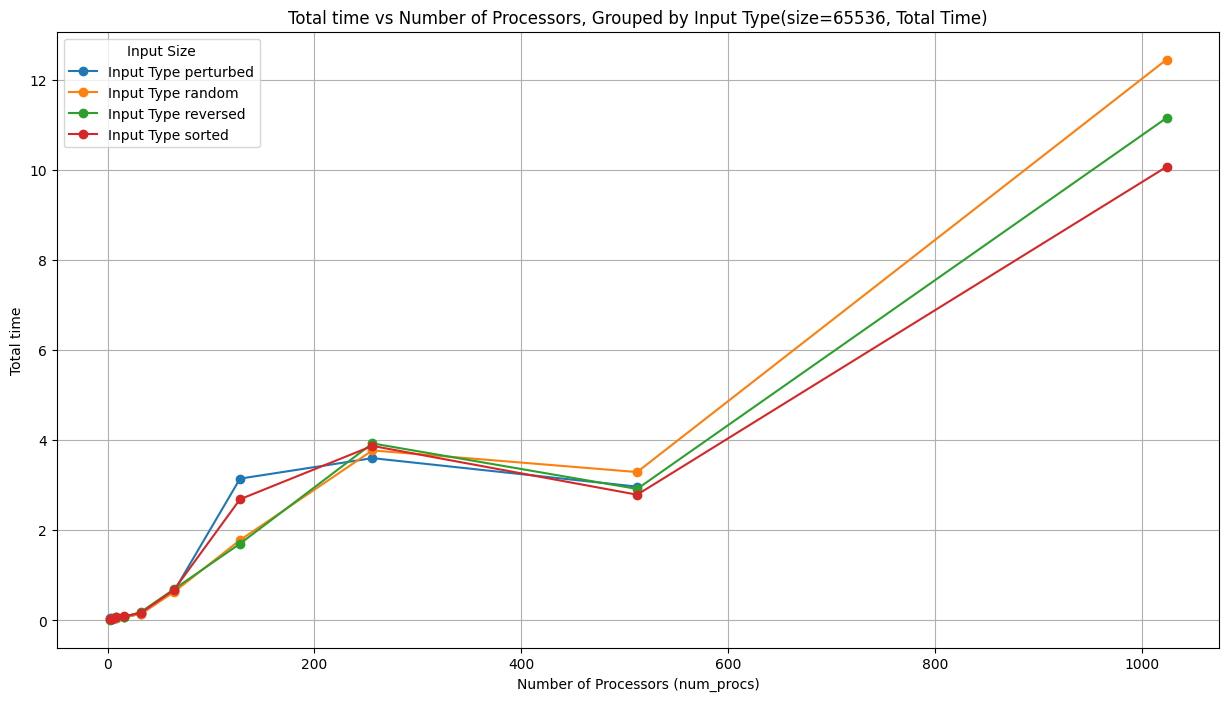

<class 'pandas.core.frame.DataFrame'>


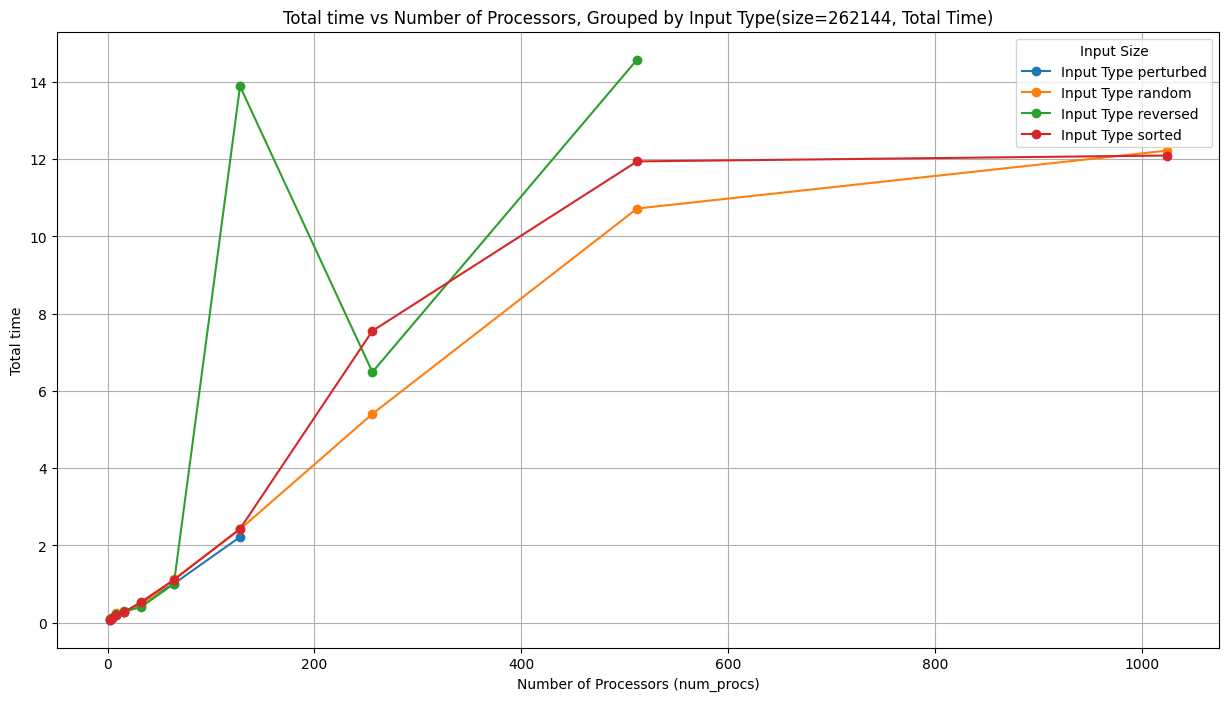

<class 'pandas.core.frame.DataFrame'>


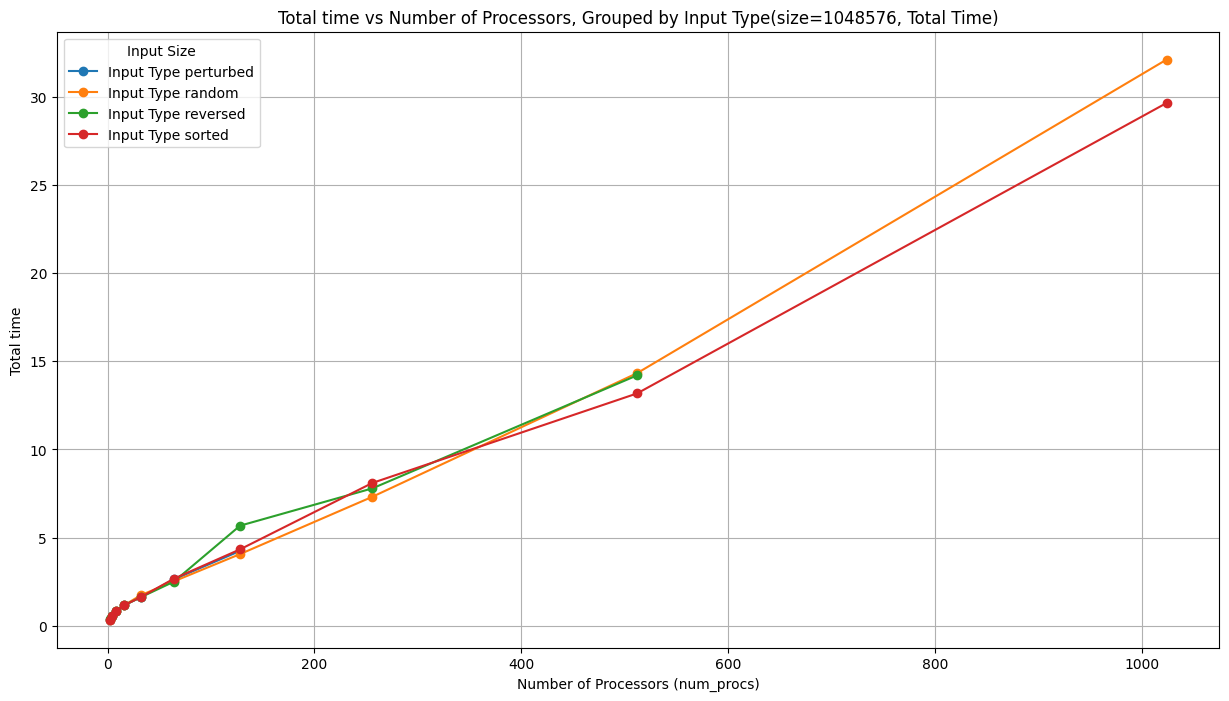

<class 'pandas.core.frame.DataFrame'>


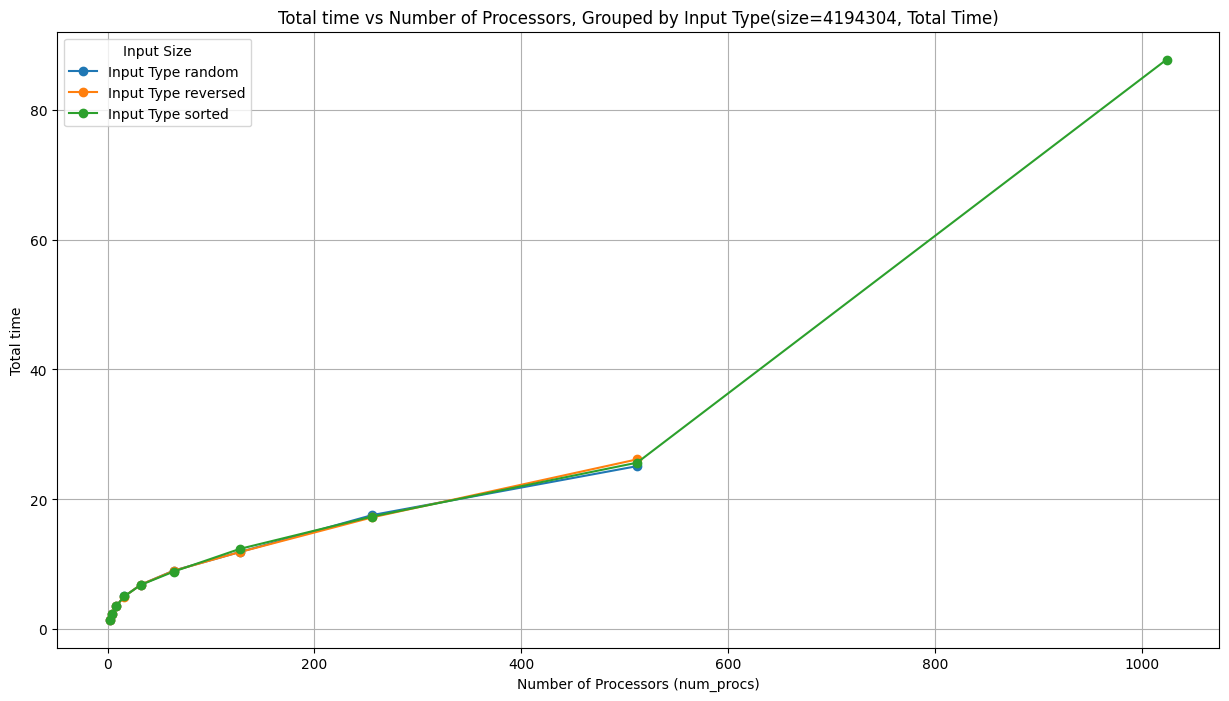

<class 'pandas.core.frame.DataFrame'>


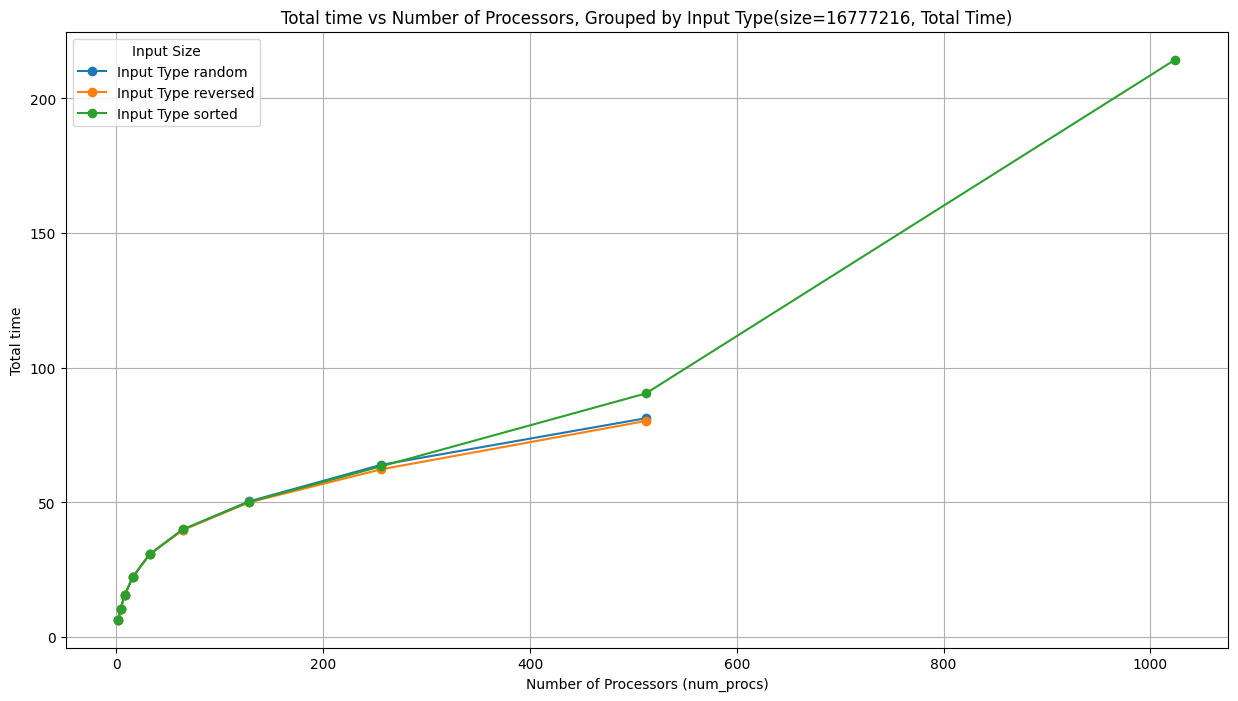

<class 'pandas.core.frame.DataFrame'>


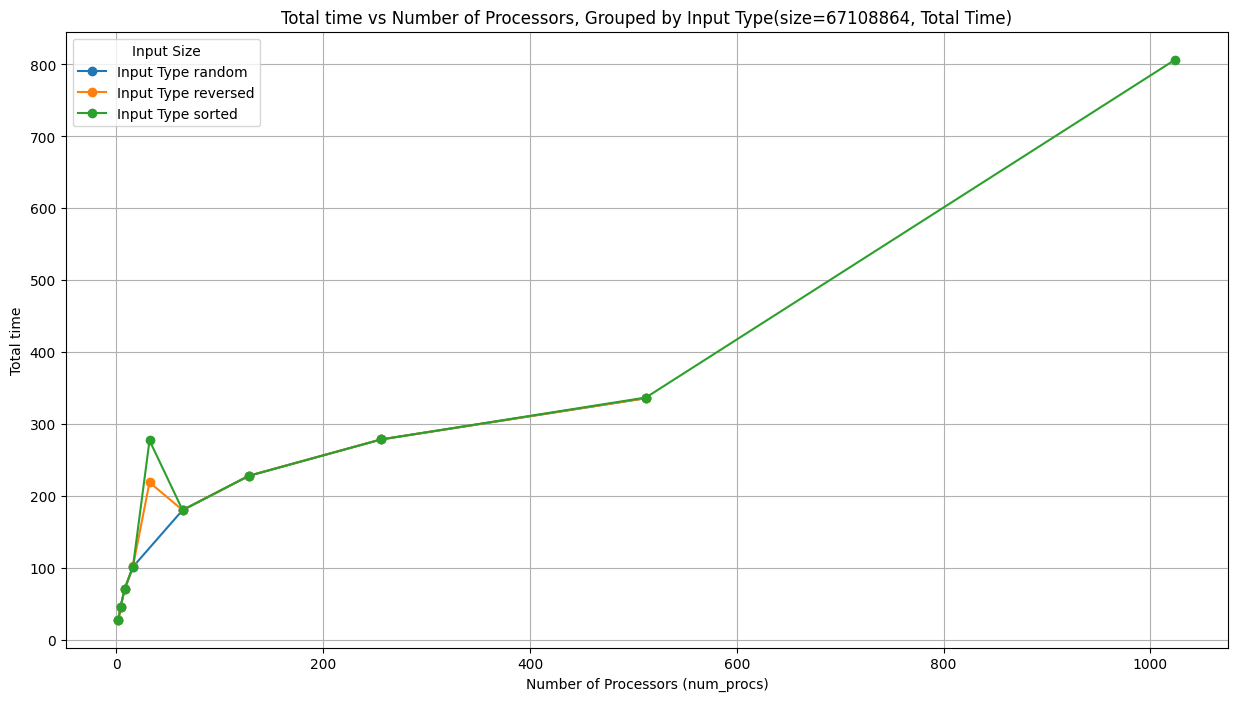

<class 'pandas.core.frame.DataFrame'>


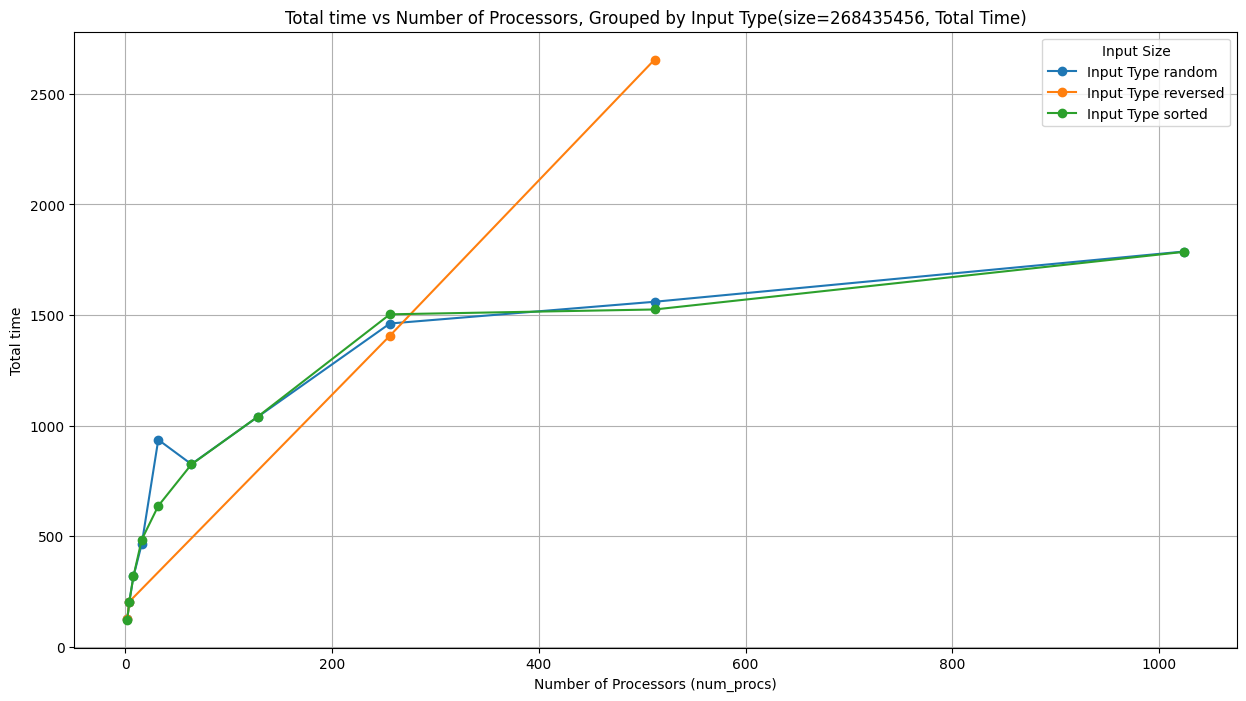

In [7]:
df = pd.merge(all_tk.dataframe, all_tk.metadata, on="profile")

input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
for input_size in input_sizes:
    strong_plot_total_time("Total time", input_size, df)

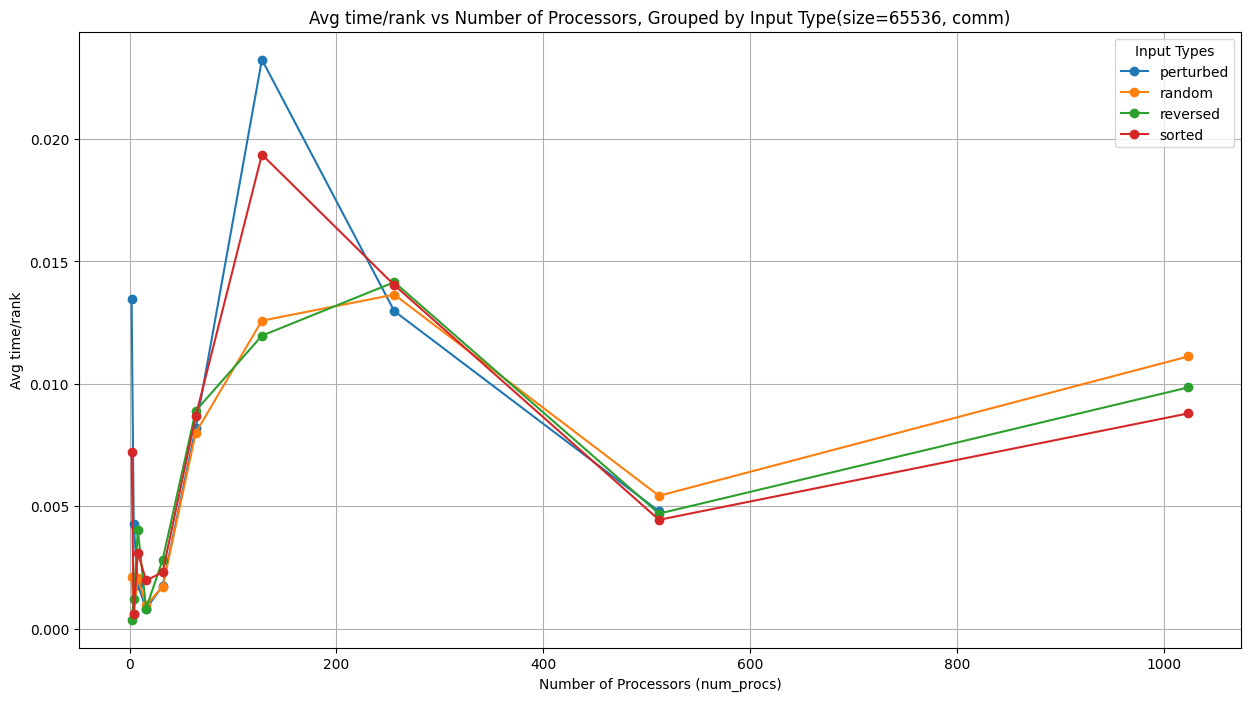

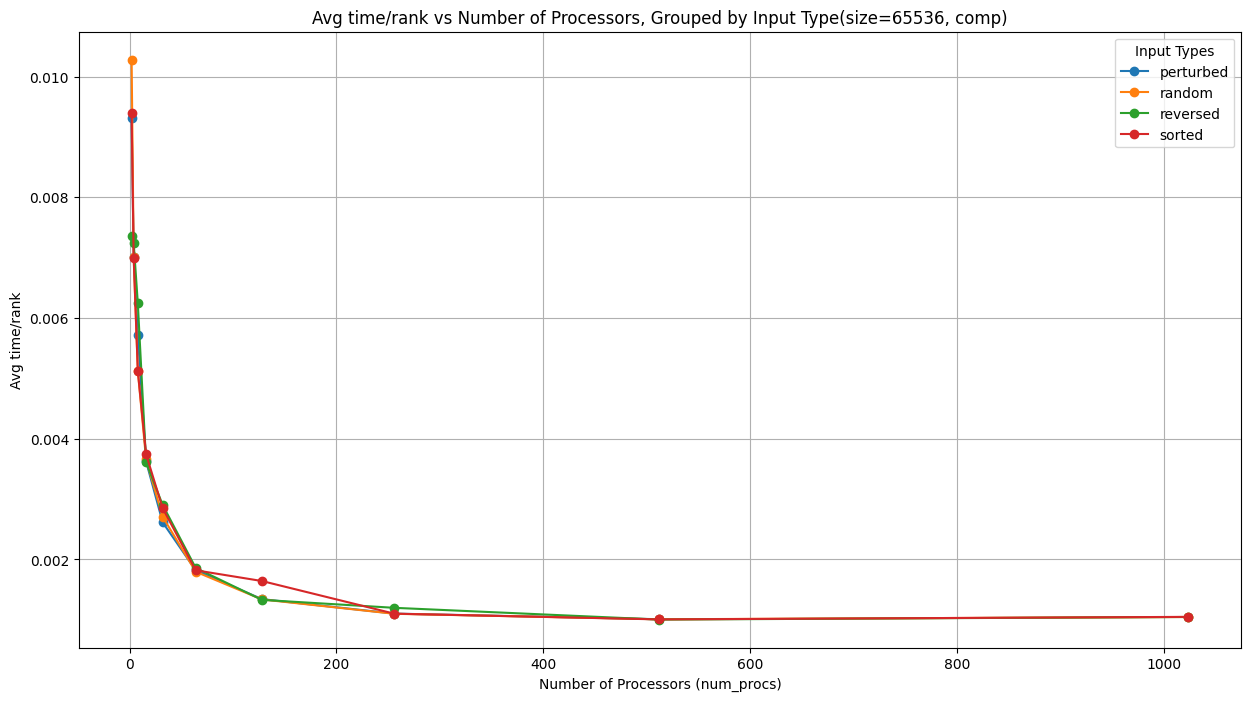

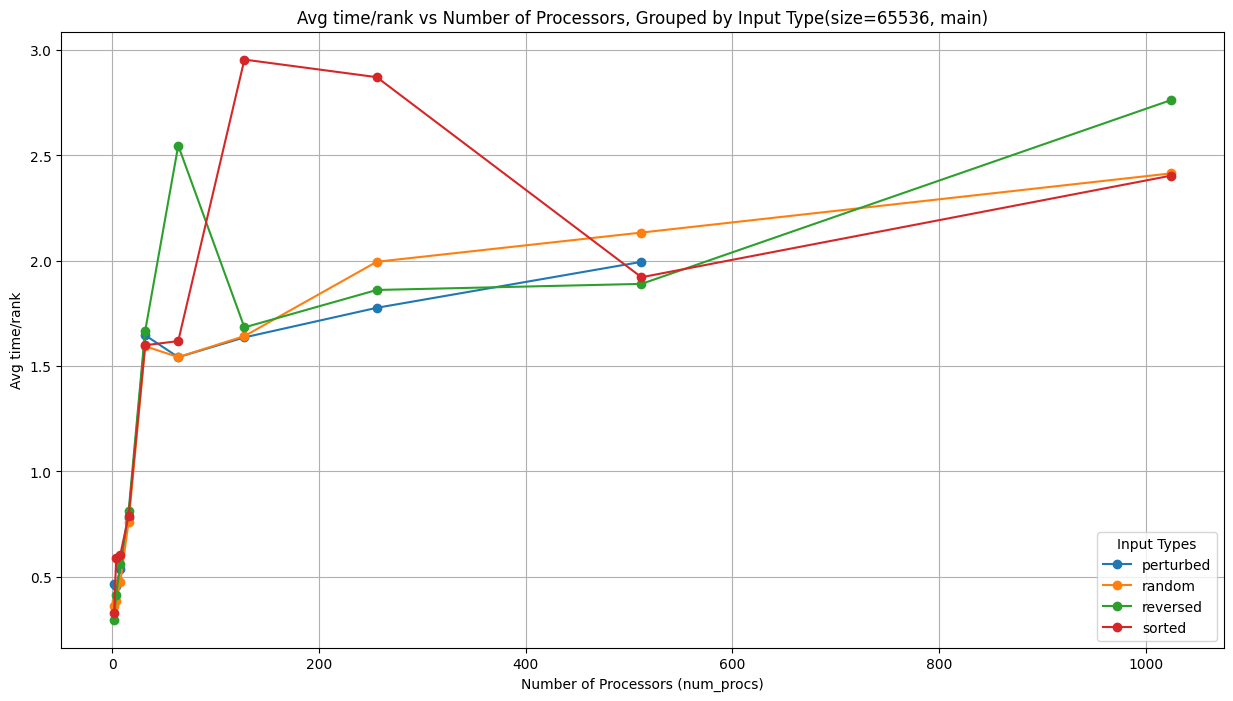

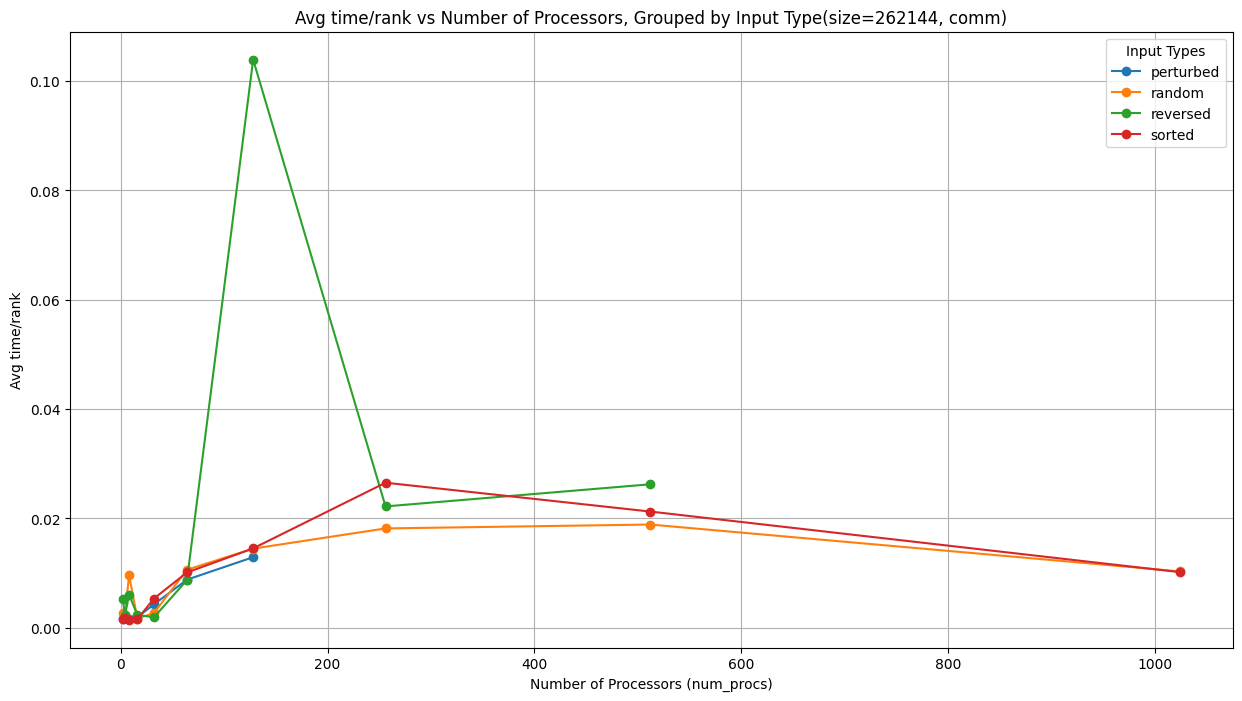

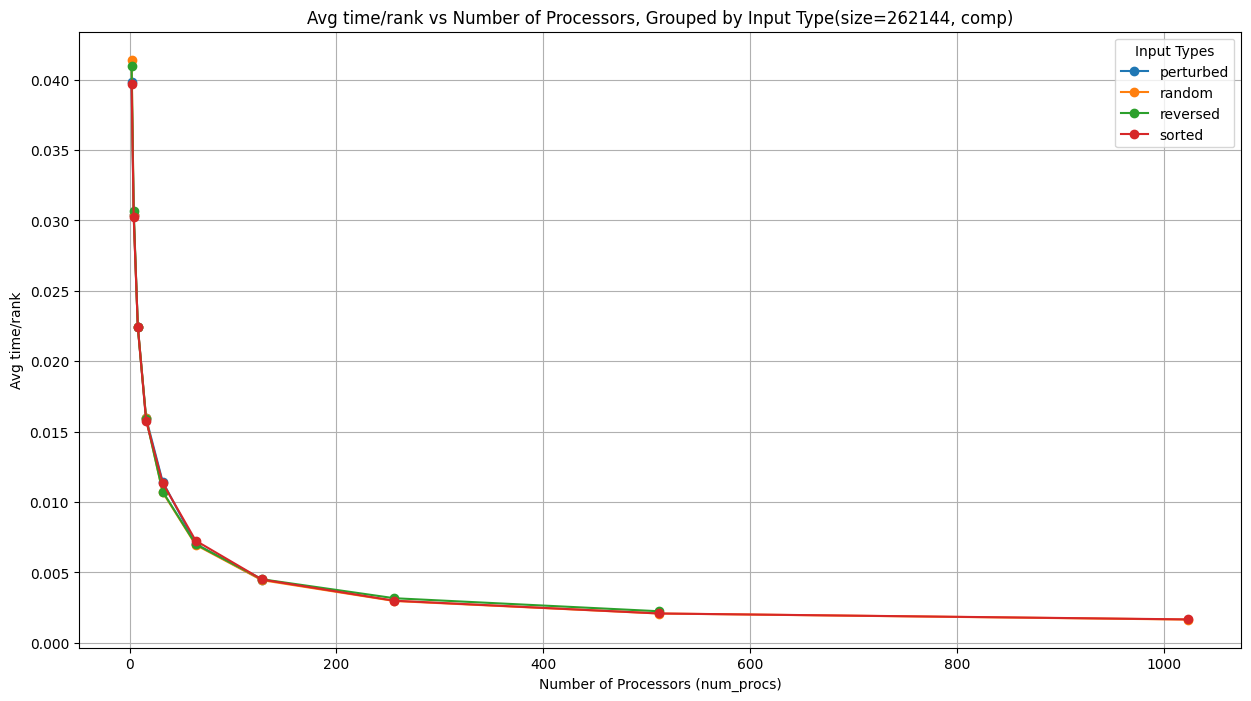

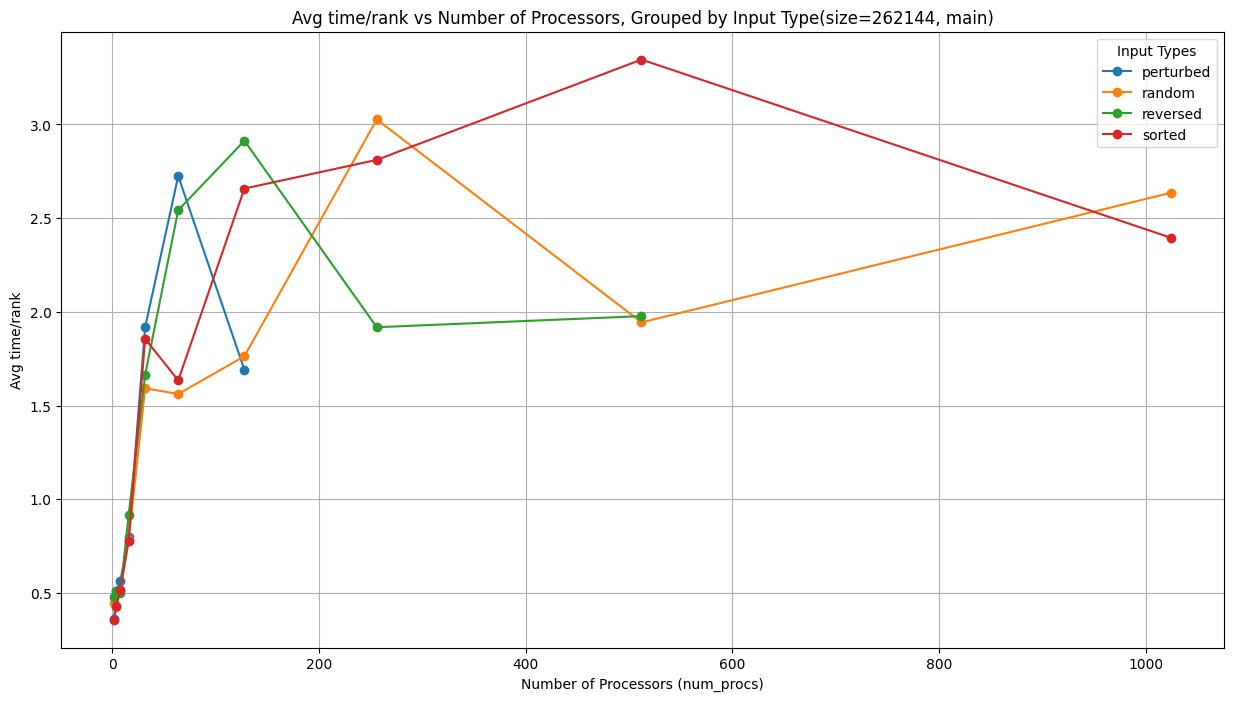

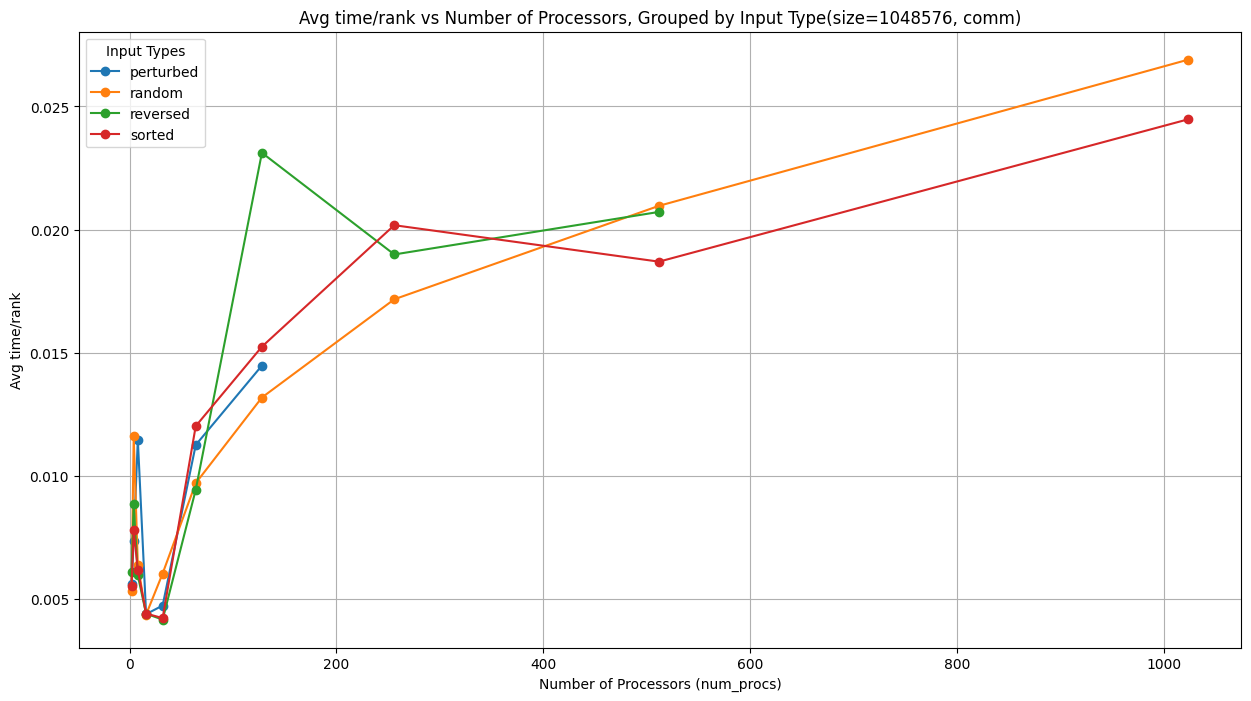

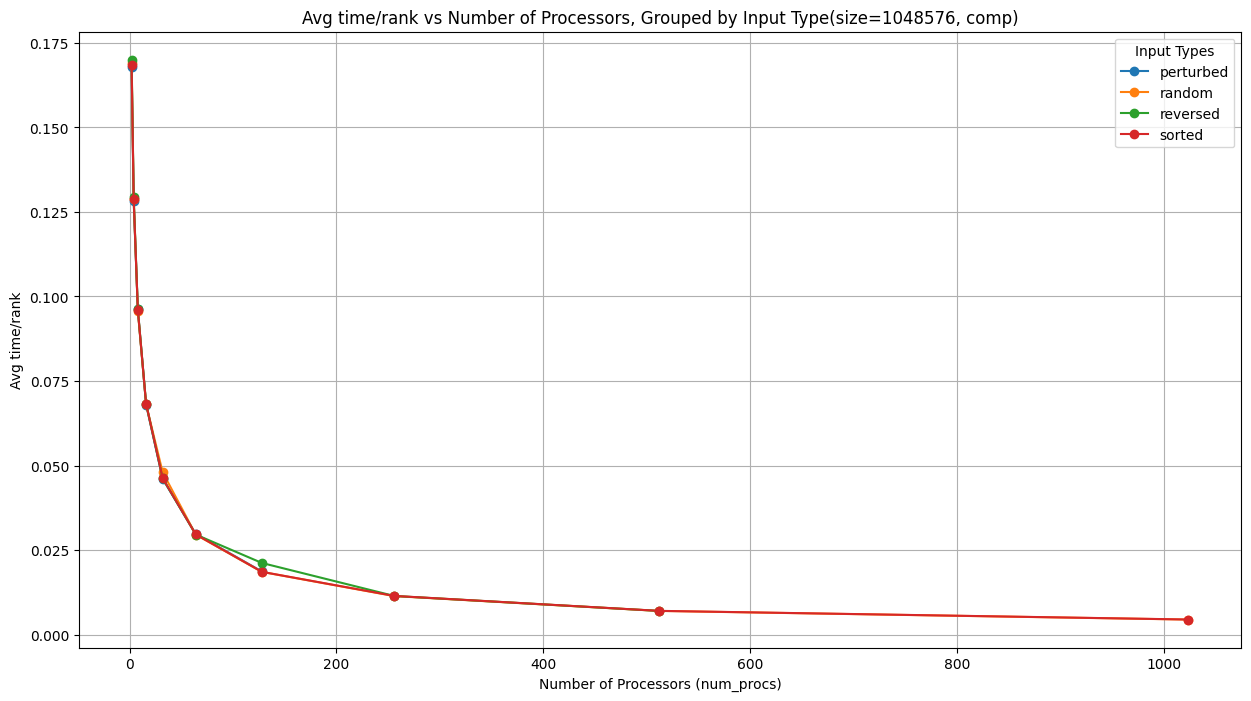

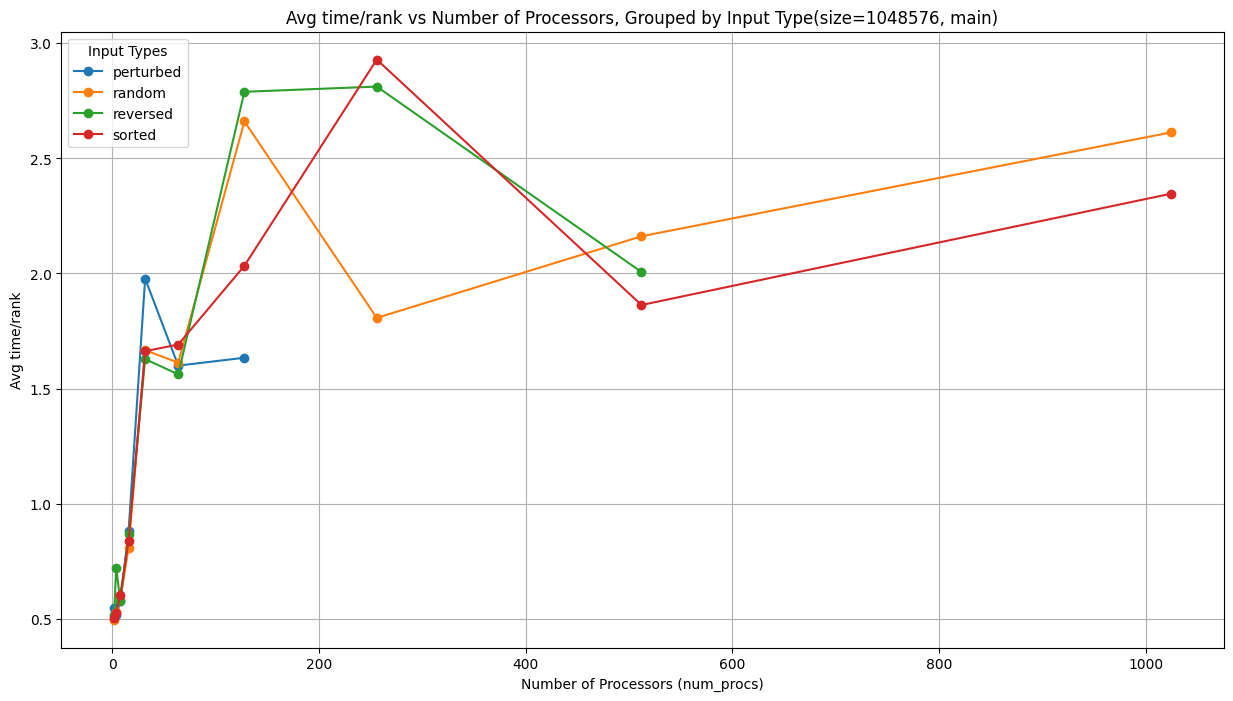

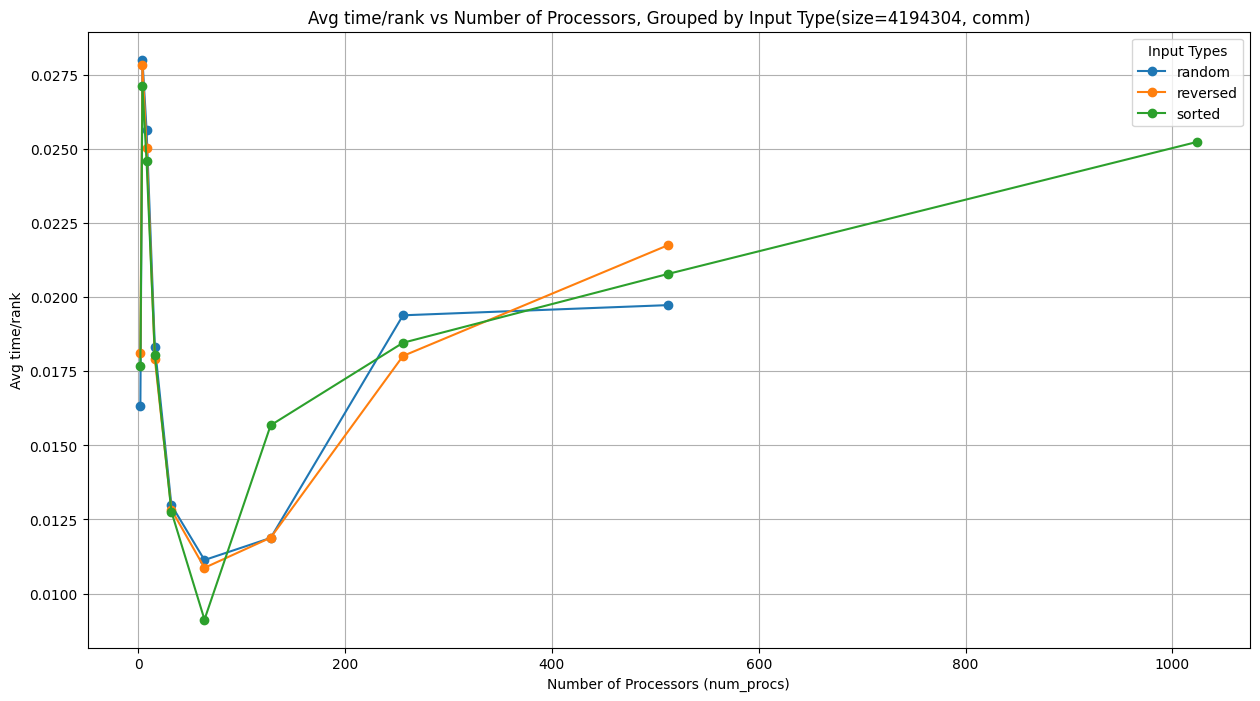

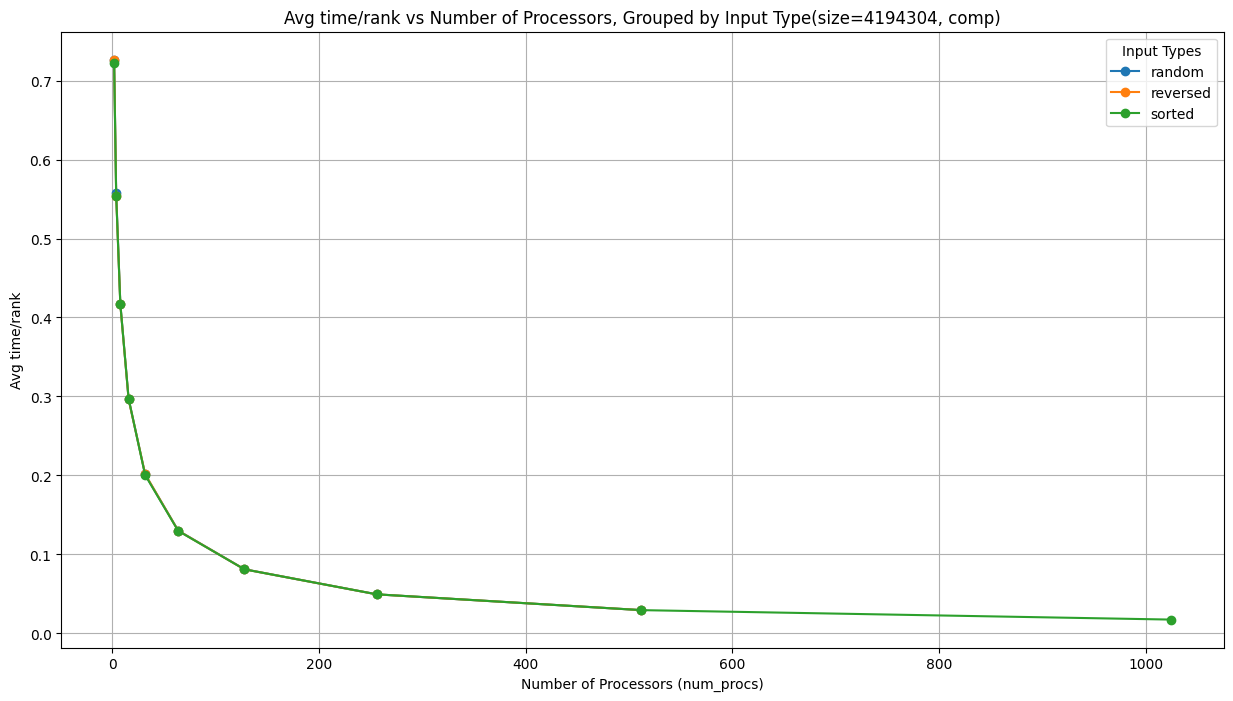

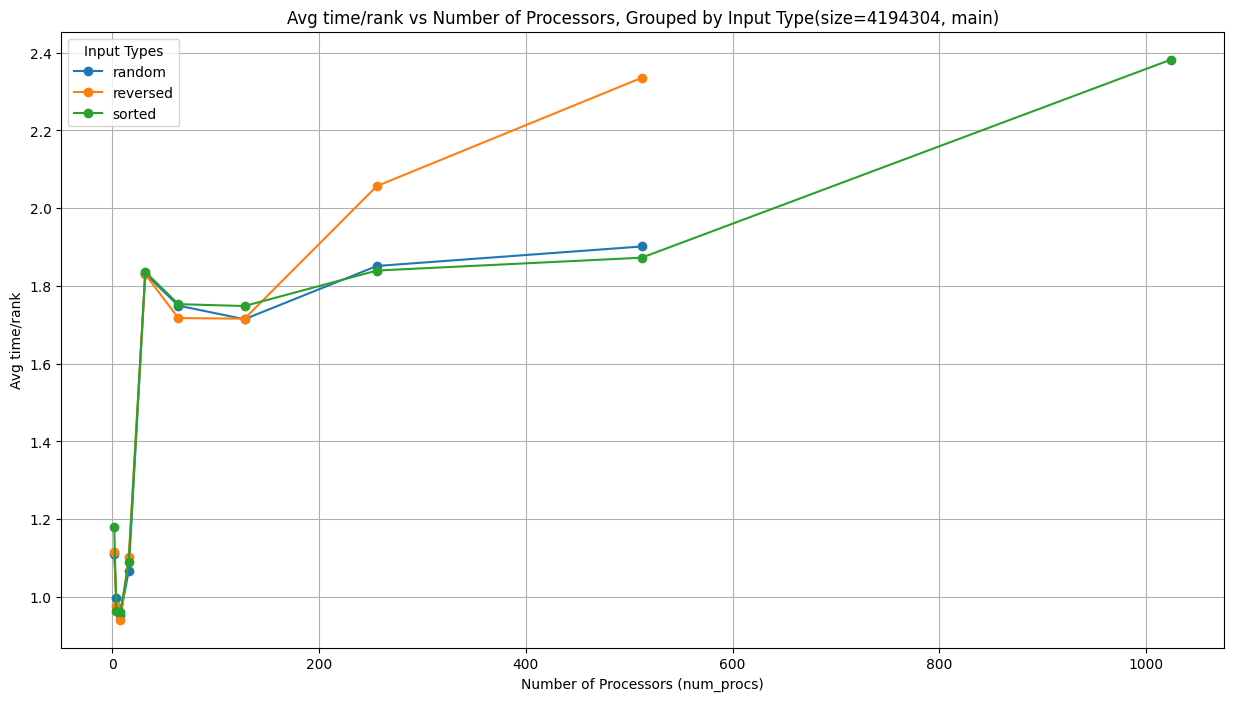

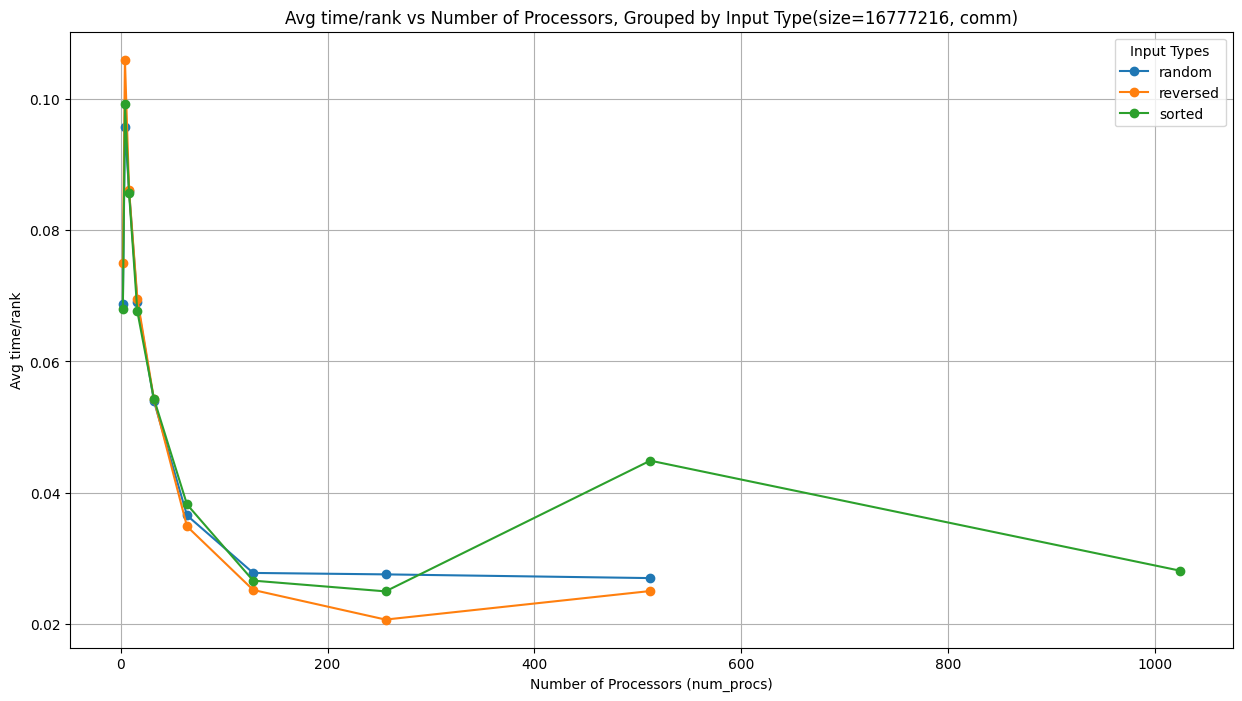

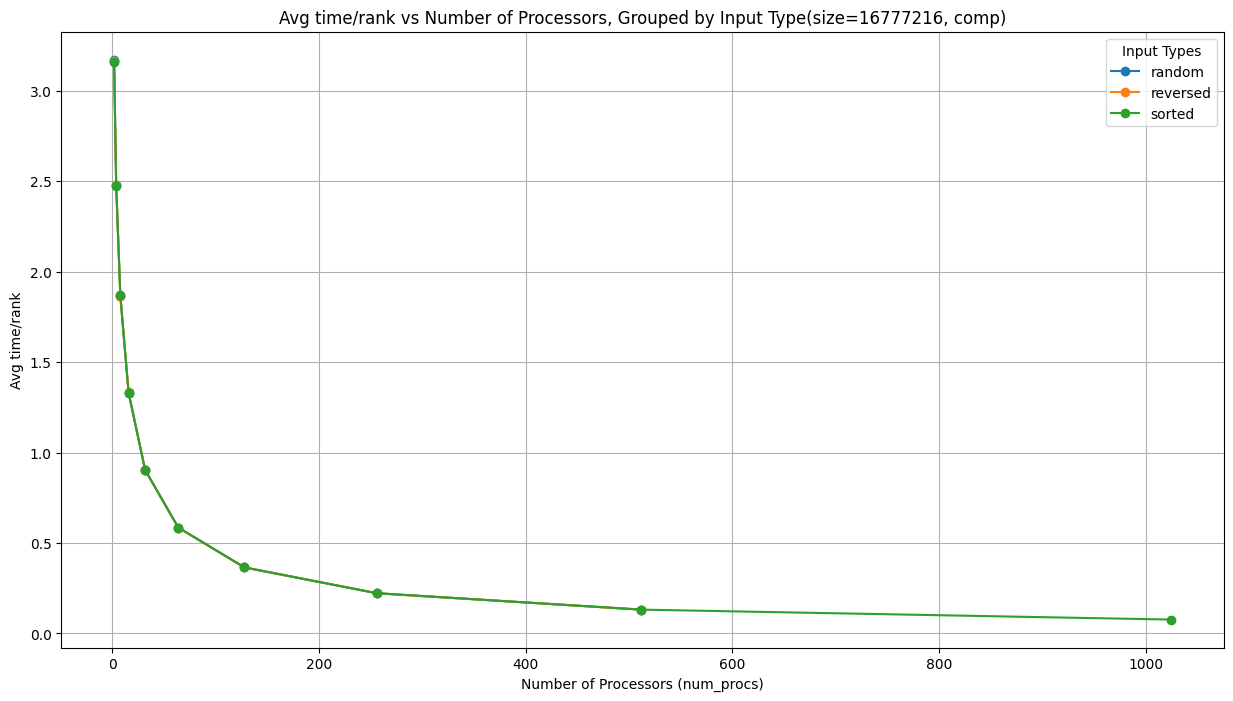

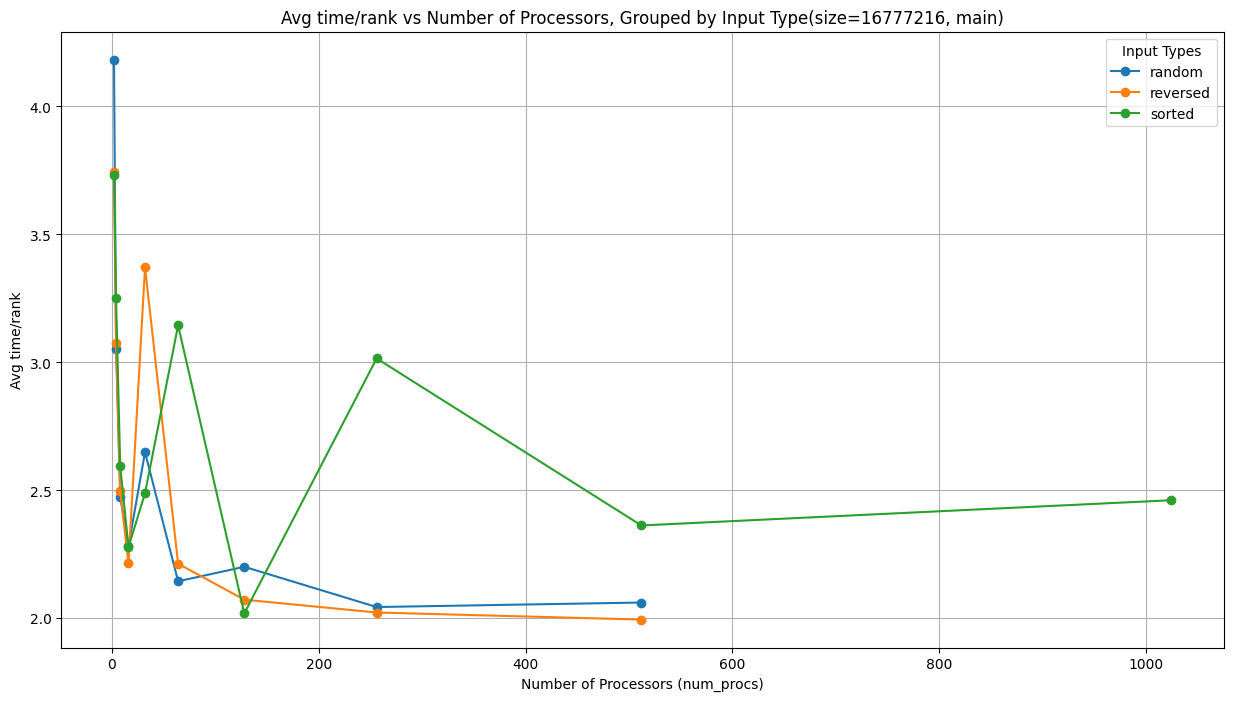

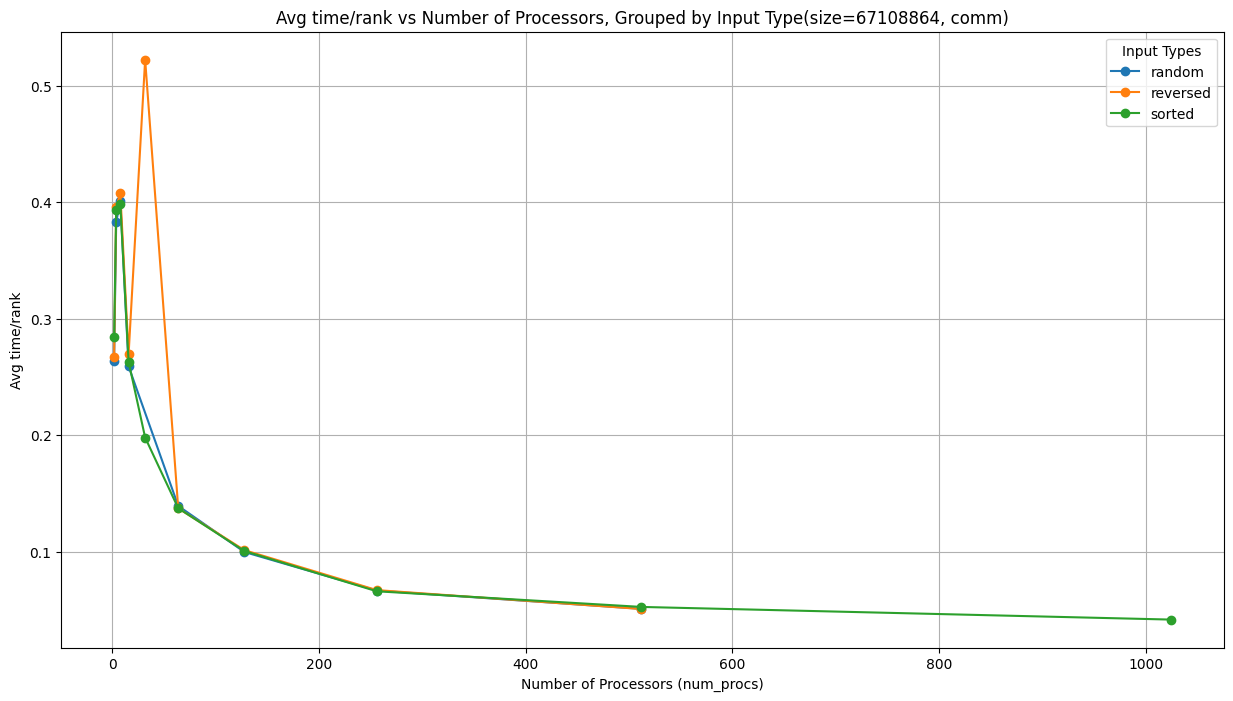

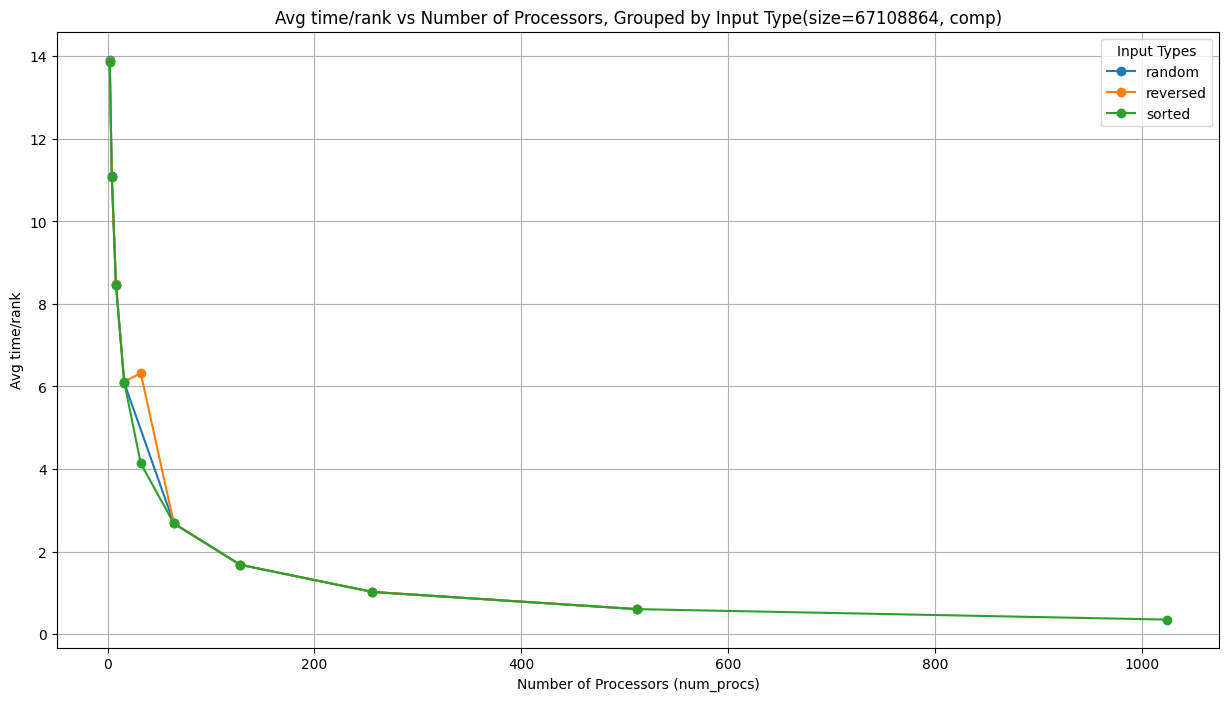

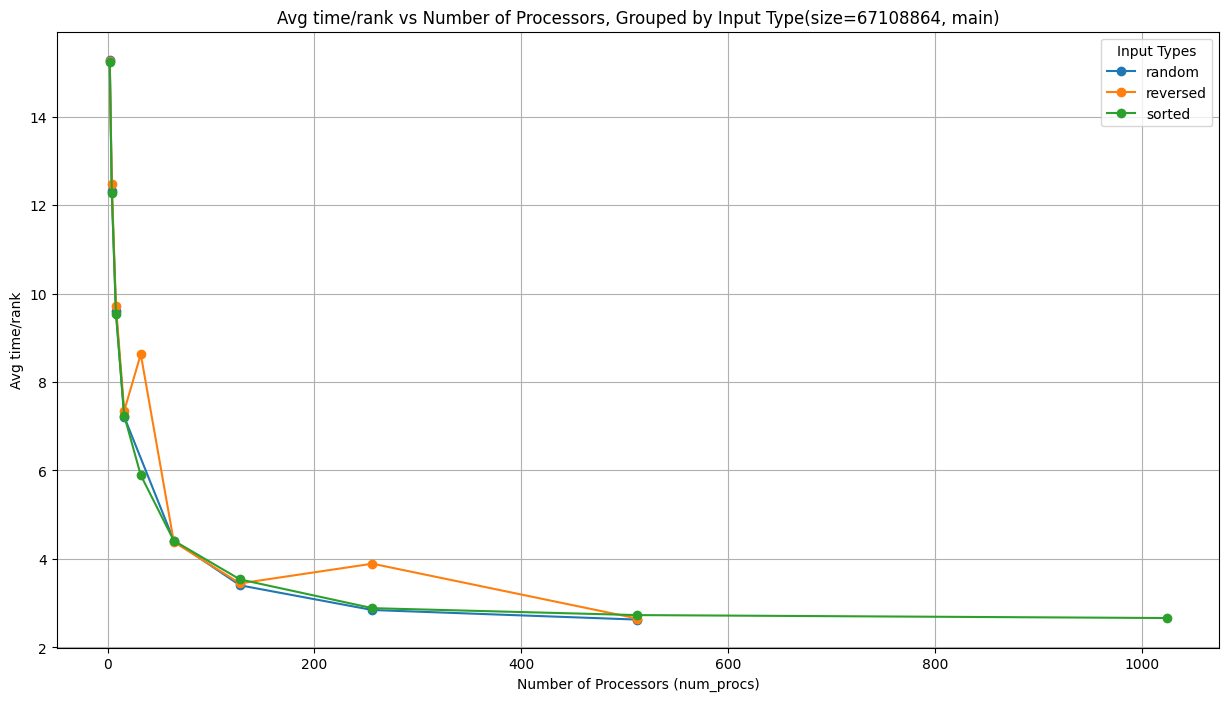

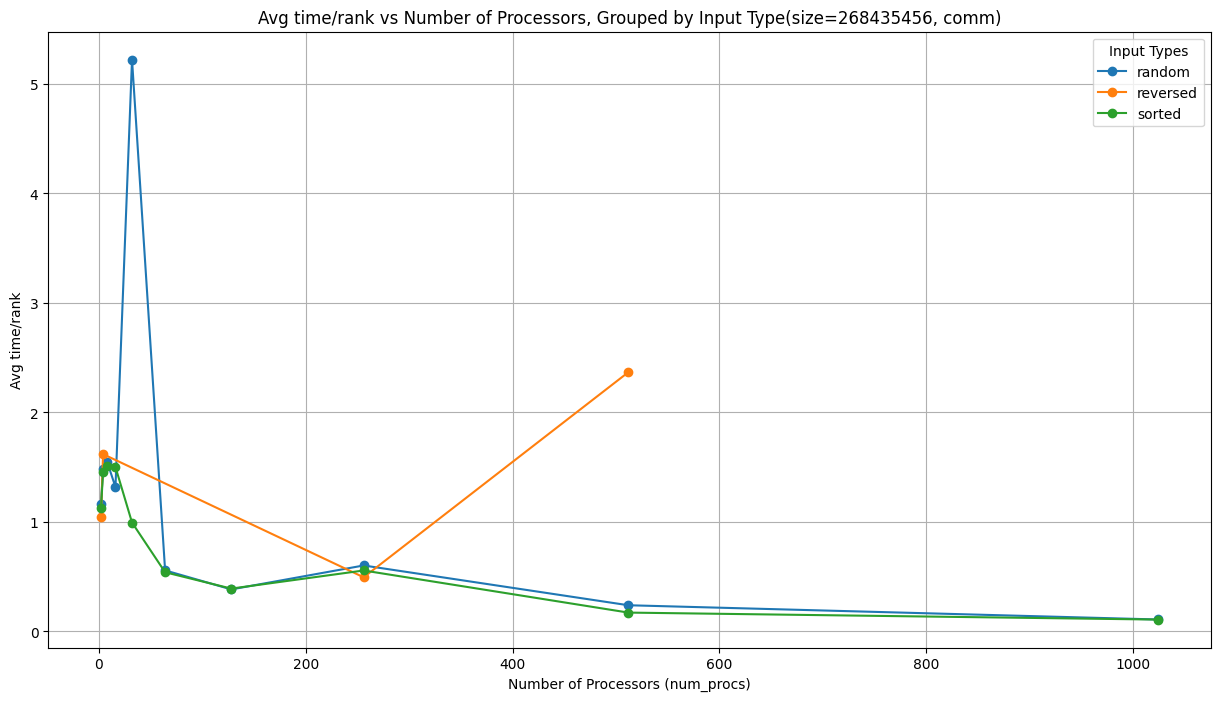

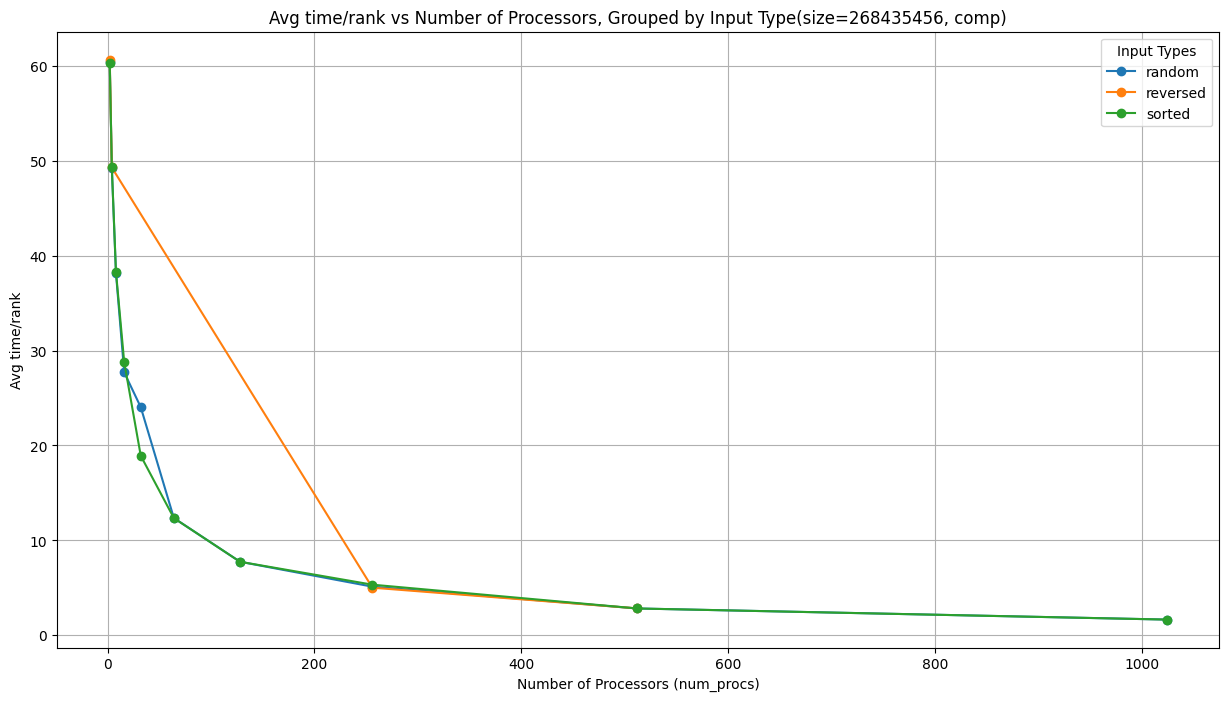

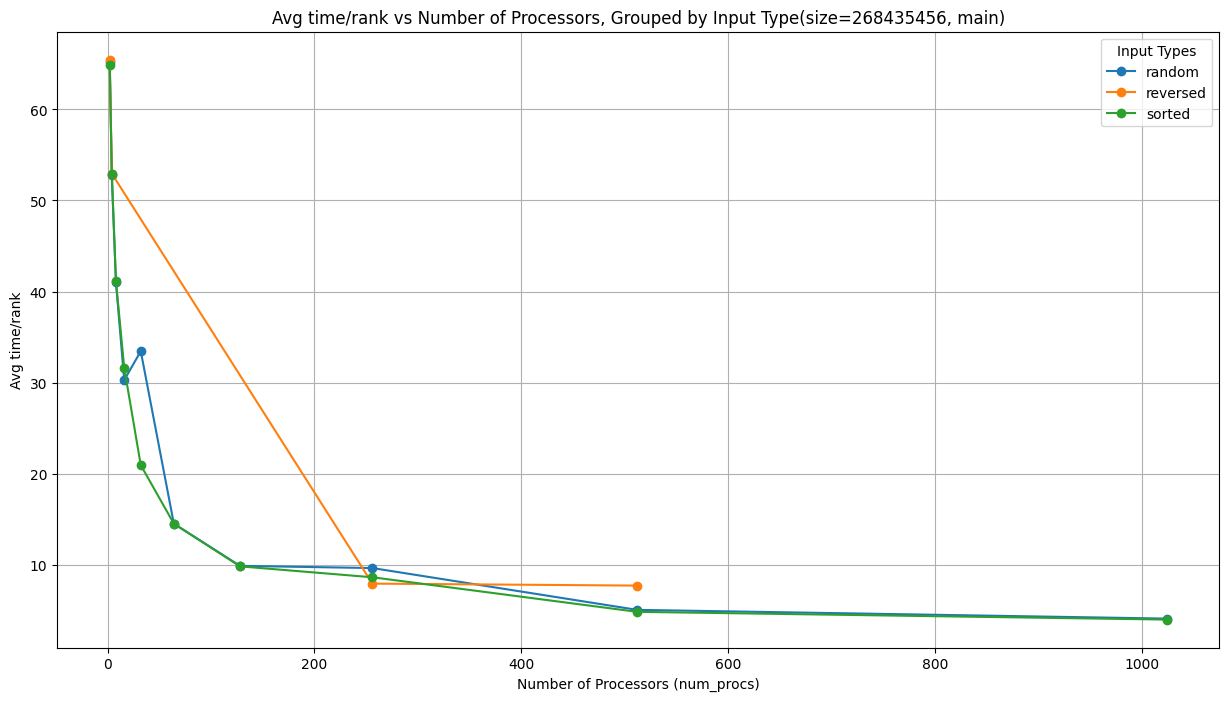

In [8]:
df = pd.merge(all_tk.dataframe, all_tk.metadata, on="profile")

input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
caliper_regions = ["comm", "comp", "main"]
for input_size in input_sizes:
    for region in caliper_regions:
        strong_plot("Avg time/rank", input_size, region, df)

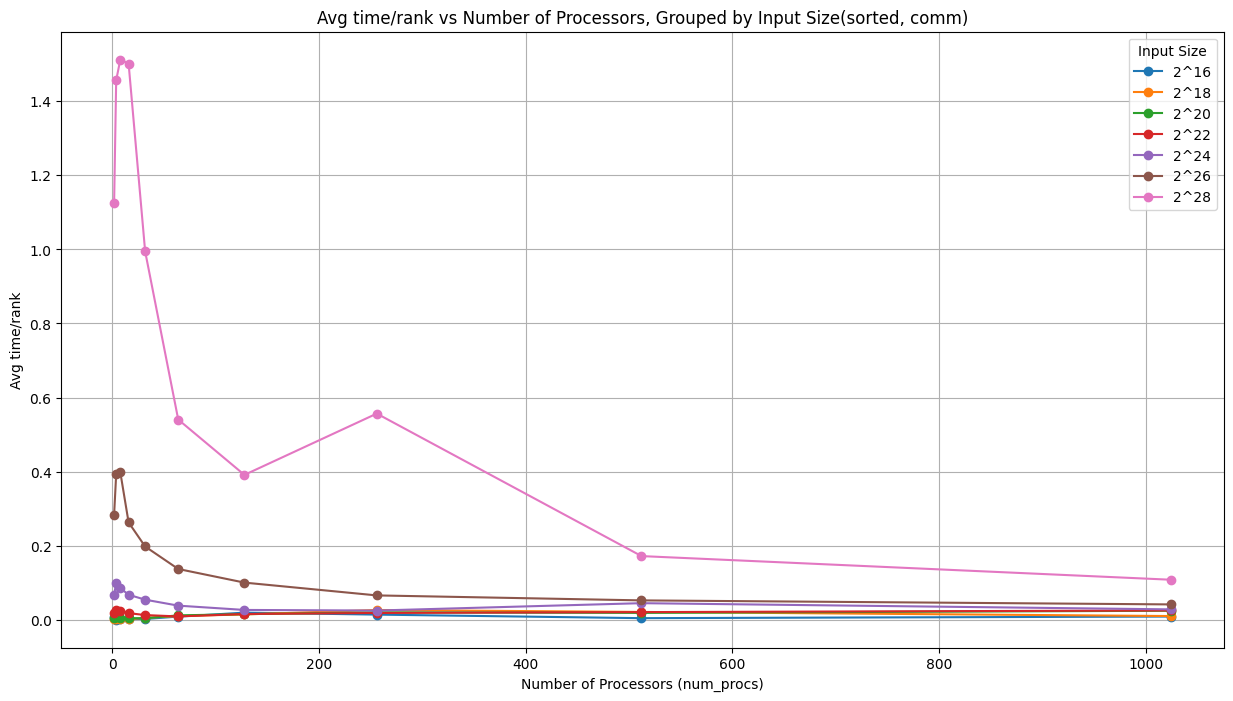

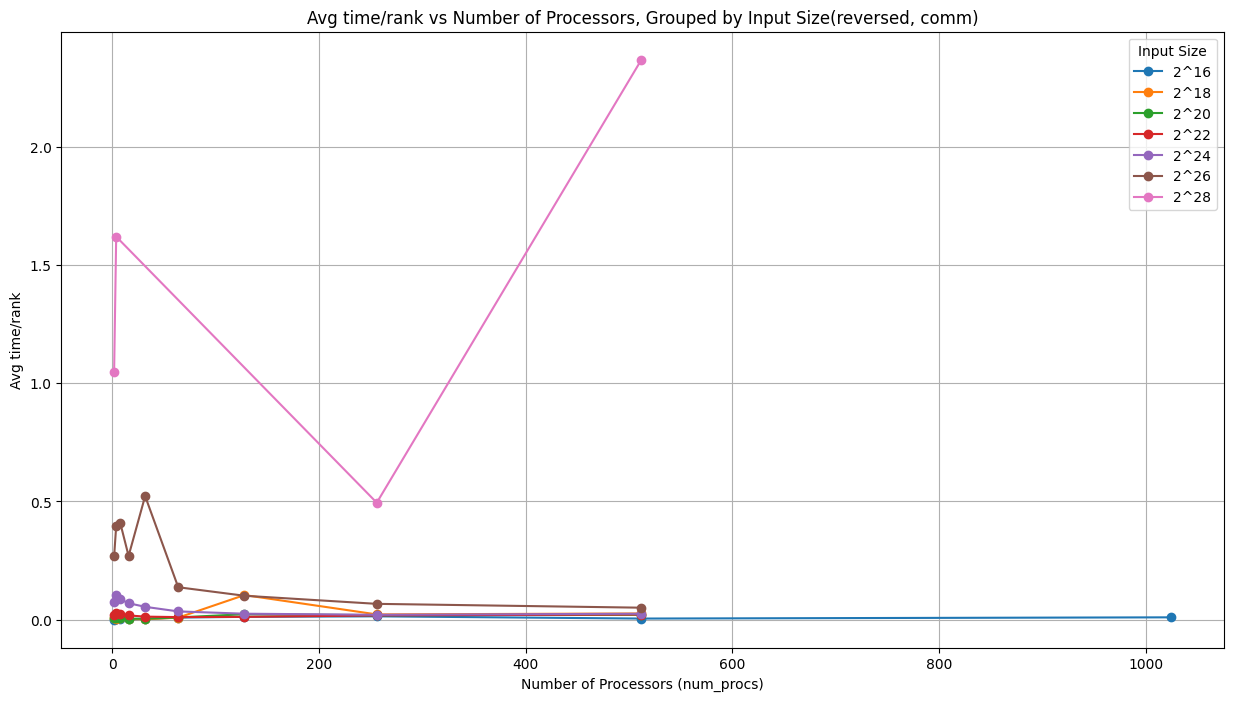

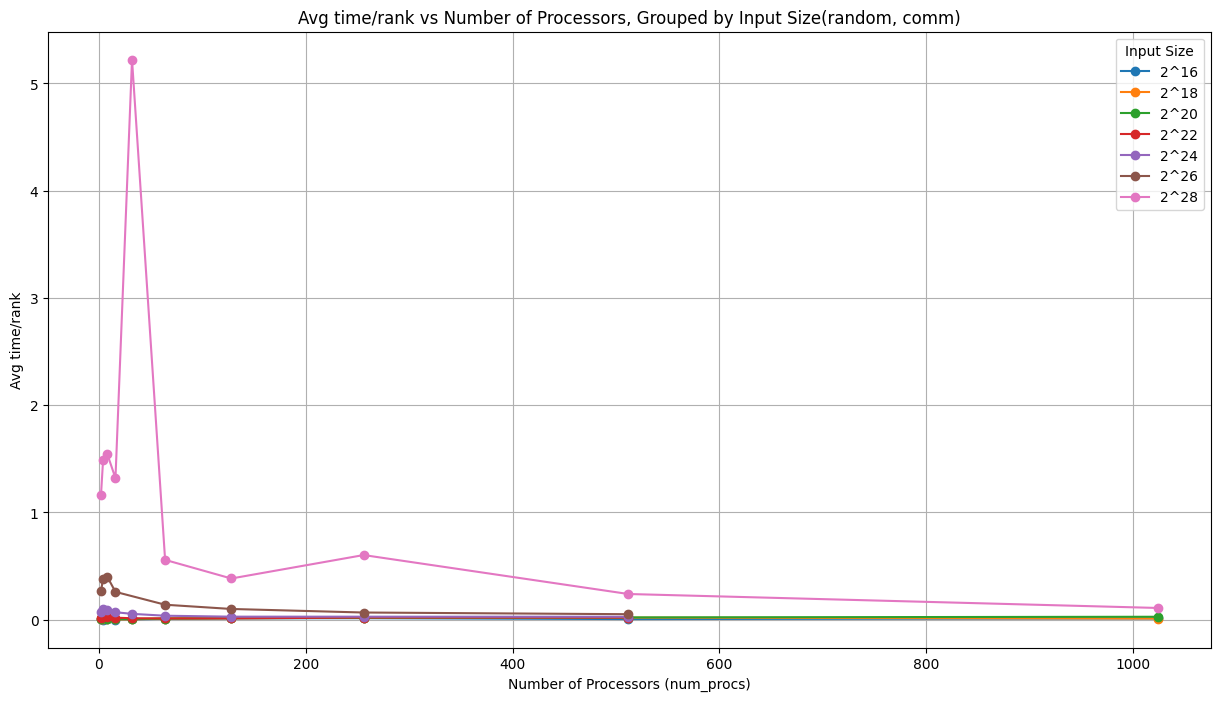

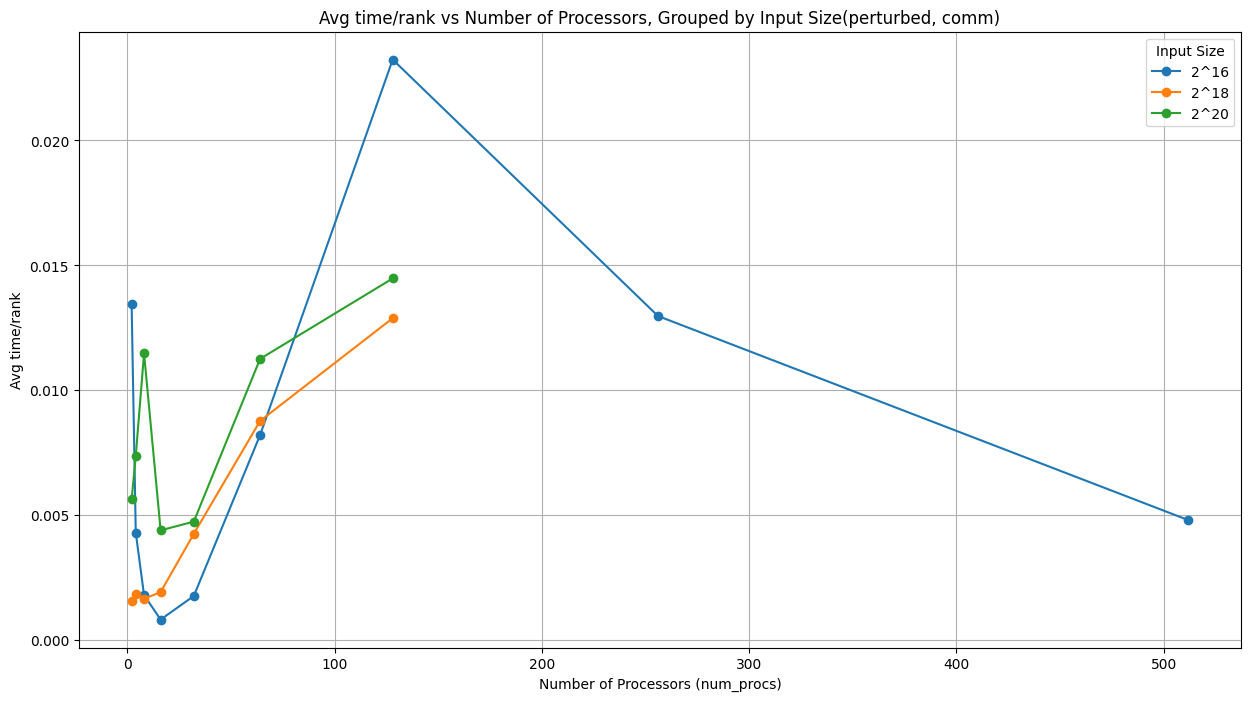

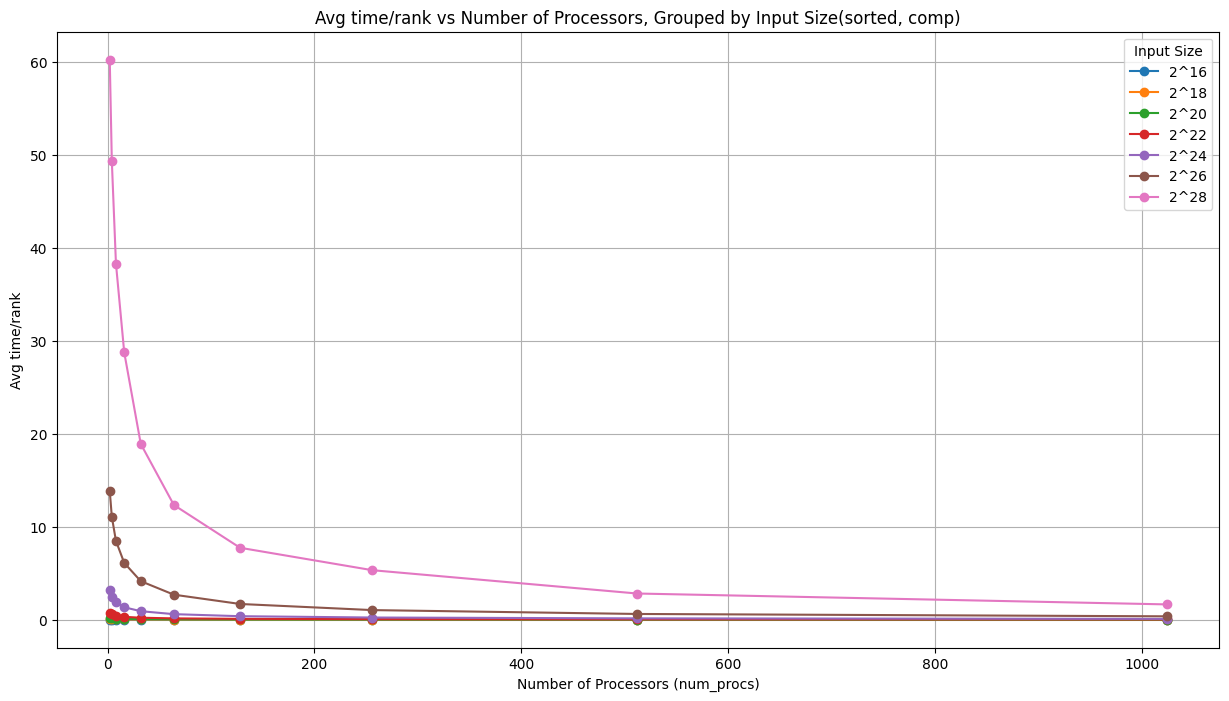

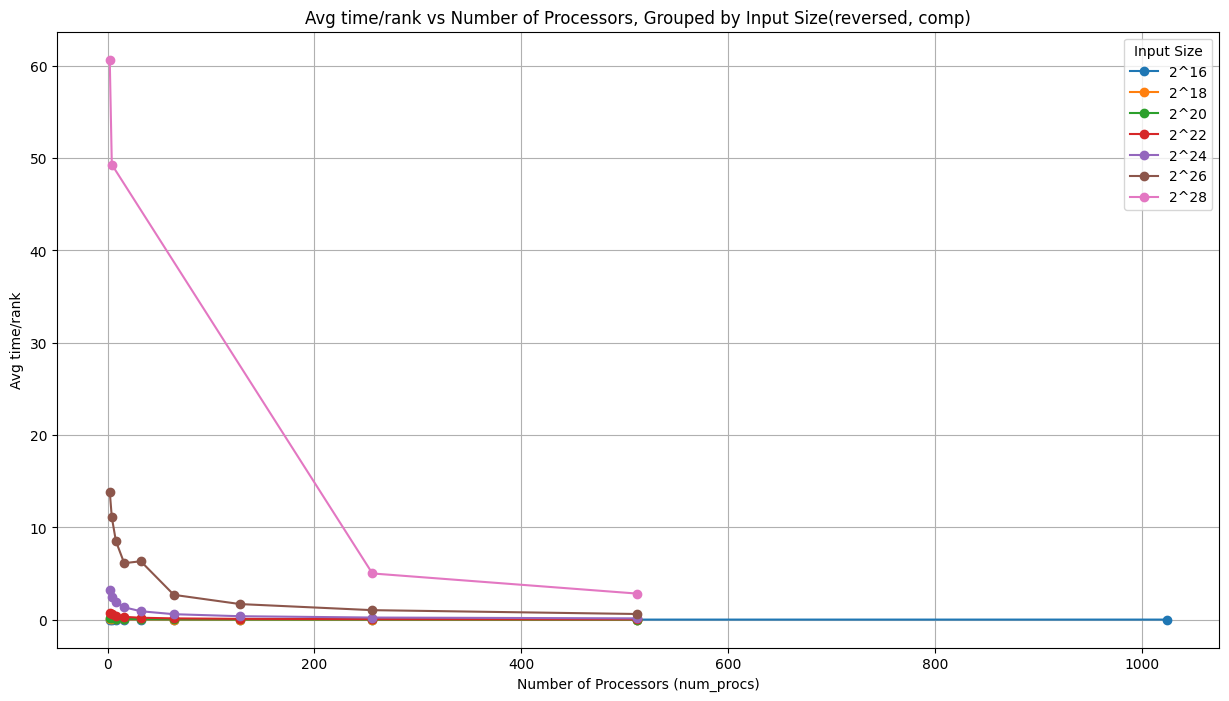

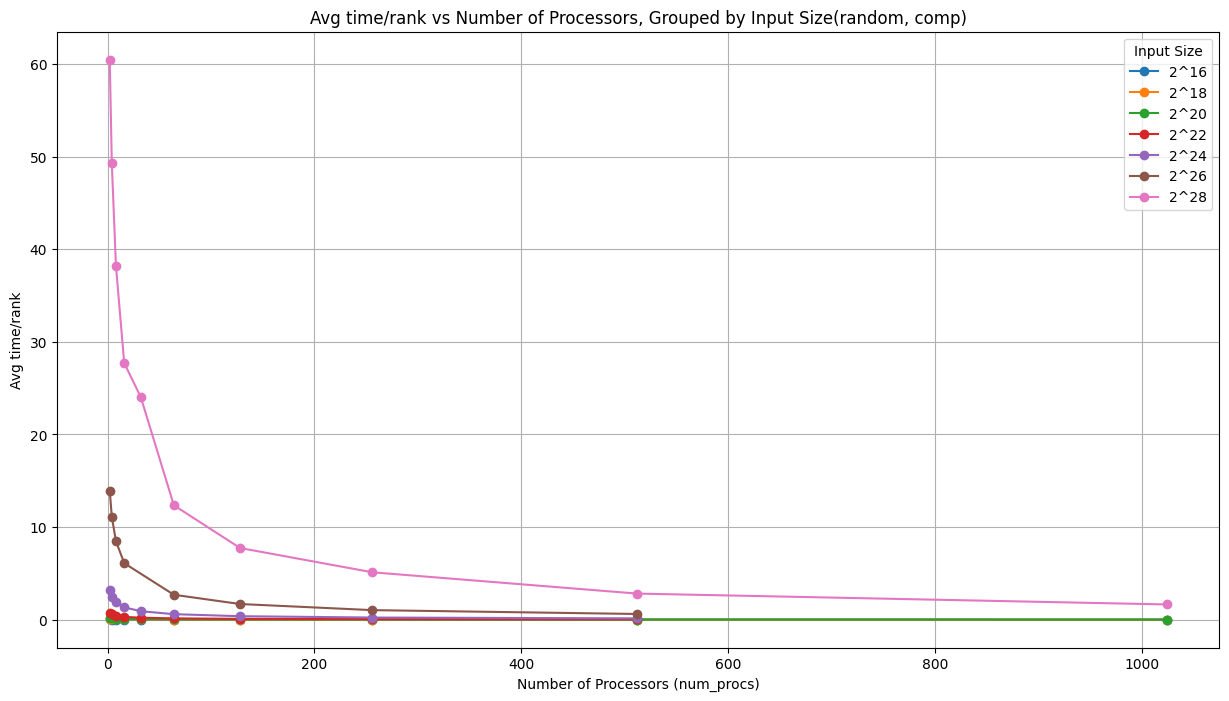

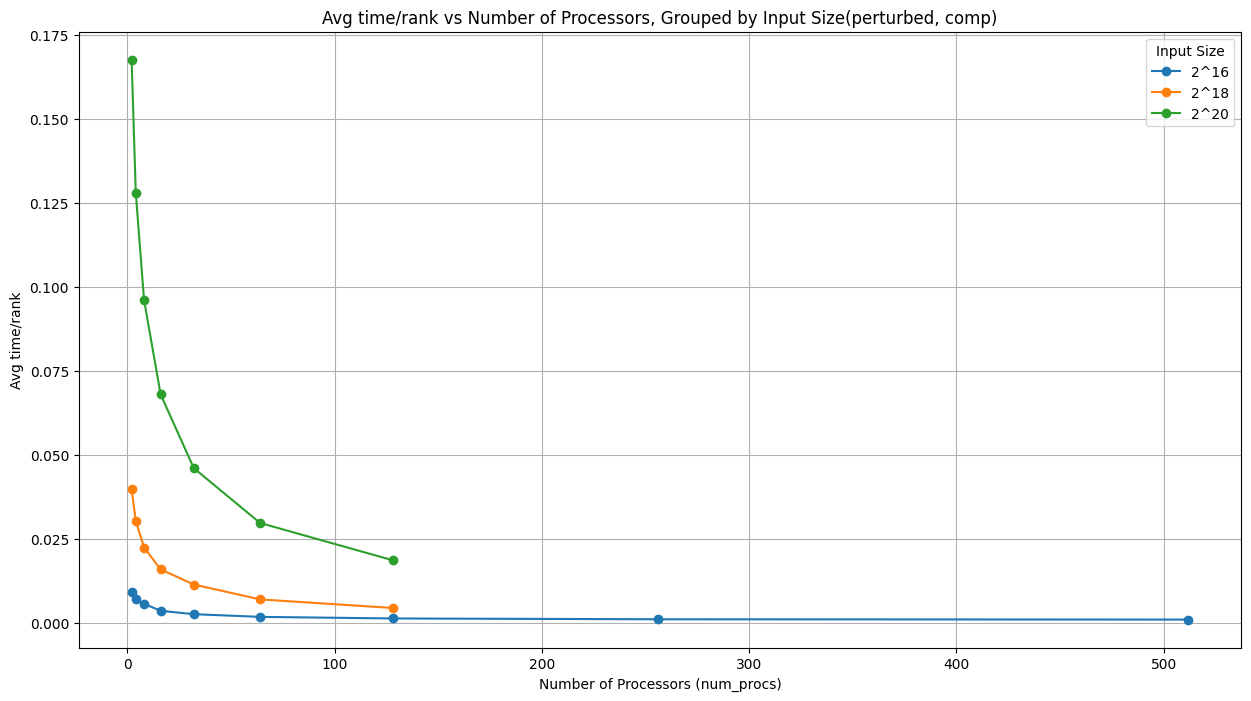

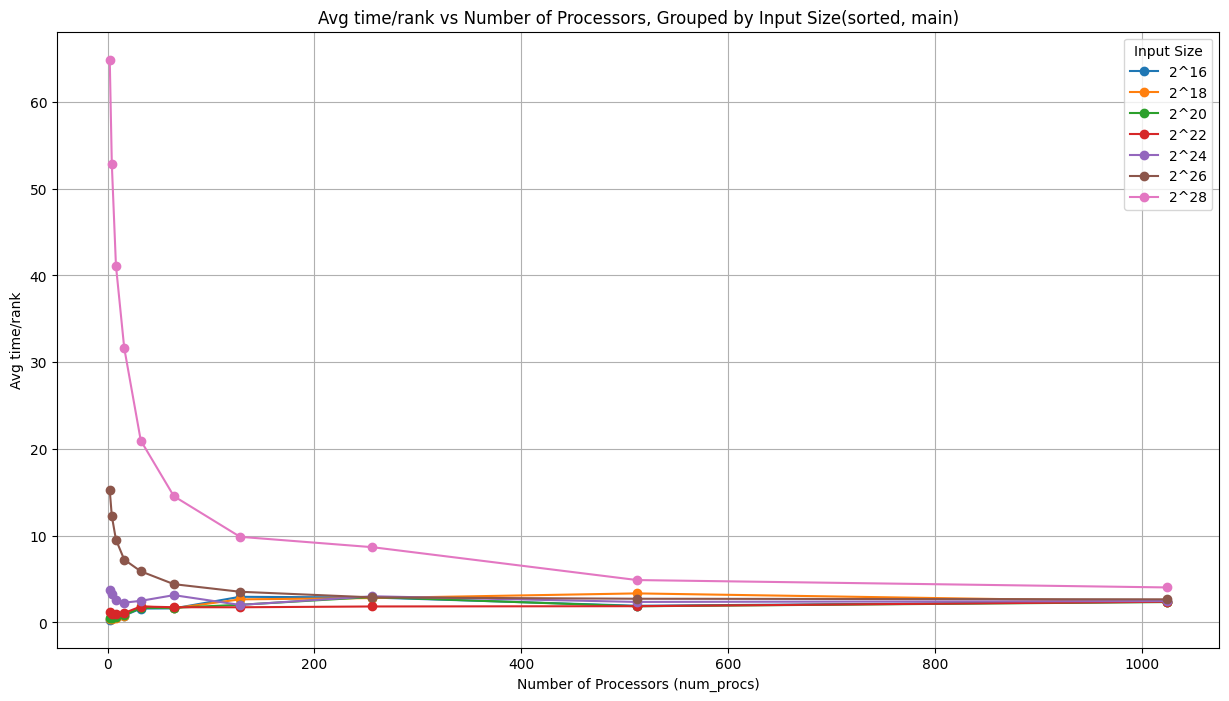

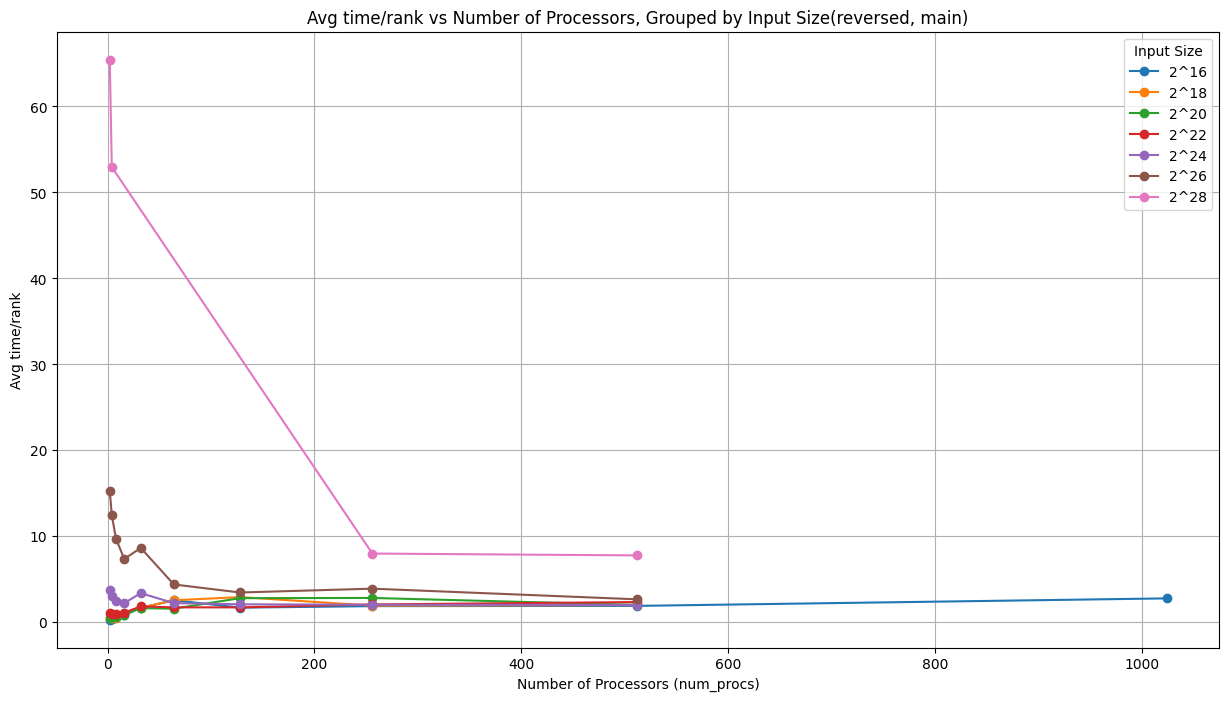

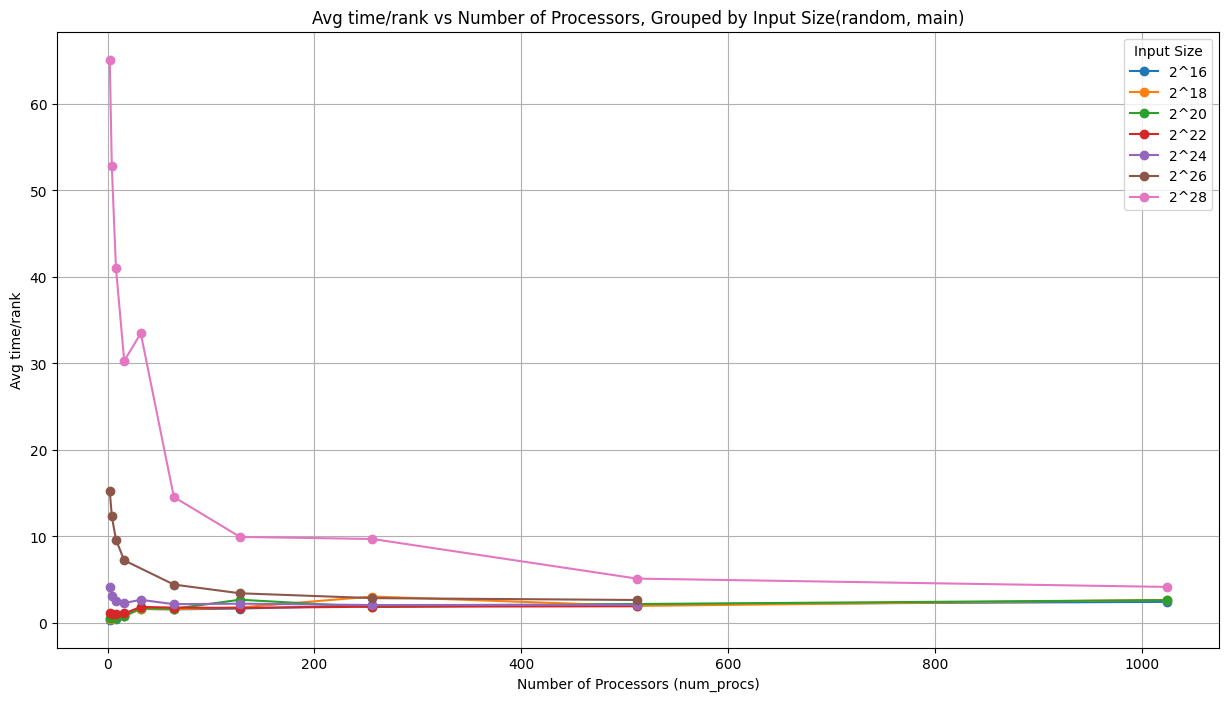

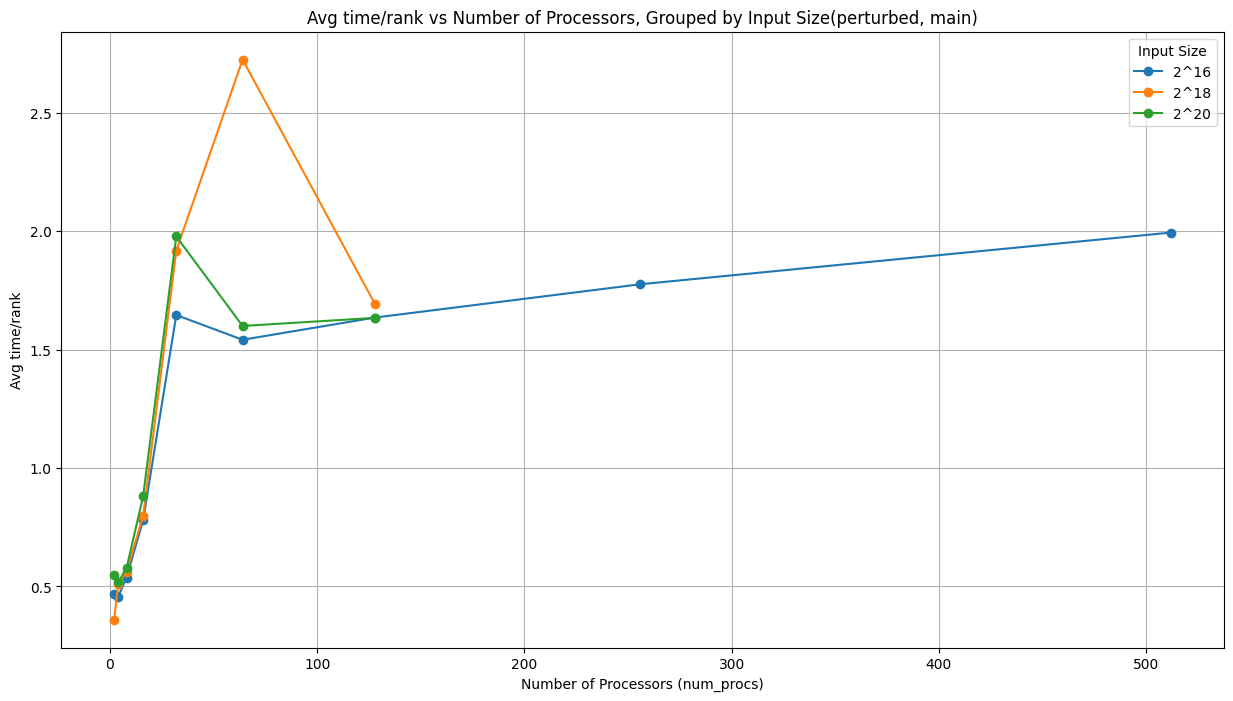

In [9]:
df = pd.merge(all_tk.dataframe, all_tk.metadata, on="profile")
input_types = ["sorted", "reversed", "random", "perturbed"]
caliper_regions = ["comm", "comp", "main"]
for region in caliper_regions:
    for input_type in input_types:
        weak_plot("Avg time/rank", input_type, region, df)